In [1]:
import os
import pandas as pd
import numpy as np
from scipy.signal import argrelmax
from sklearn import metrics
from matplotlib import pyplot as plt
from lmfit import Parameters
from lmfit.models import ExponentialGaussianModel

In [2]:
auc = {}

# 5 min AC

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 125
    # data points      = 472
    # variables        = 16
    chi-square         = 1231.49982
    reduced chi-square = 2.70065750
    Akaike info crit   = 484.652289
    Bayesian info crit = 551.163953
##  Warning: uncertainties could not be estimated:
    egm1_gamma:      at initial value
    egm1_gamma:      at boundary
    egm3_gamma:      at initial value
    egm3_gamma:      at boundary
[[Variables]]
    egm1_amplitude:  6.50085291 (init = 7)
    egm1_sigma:      0.04422584 (init = 0.1)
    egm1_center:     16.4115775 (init = 16.5)
    egm1_gamma:      10.0000000 (init = 10)
    egm1_height:     23.5959806 == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.10414390

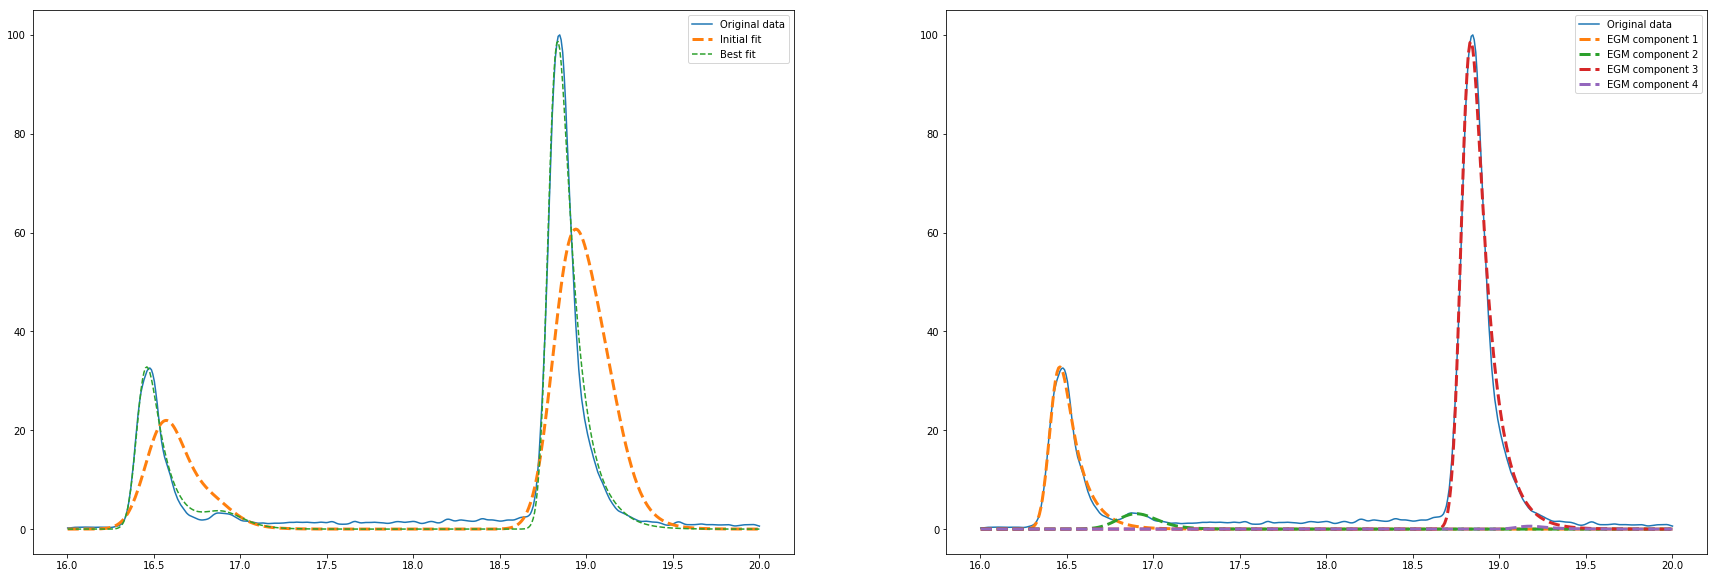

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 172
    # data points      = 472
    # variables        = 16
    chi-square         = 1017.60161
    reduced chi-square = 2.23158247
    Akaike info crit   = 394.602100
    Bayesian info crit = 461.113764
##  Warning: uncertainties could not be estimated:
    egm1_gamma:      at initial value
    egm1_gamma:      at boundary
    egm3_gamma:      at initial value
    egm3_gamma:      at boundary
[[Variables]]
    egm1_amplitude:  8.78183598 (init = 7)
    egm1_sigma:      0.04319791 (init = 0.1)
    egm1_center:     16.4202625 (init = 16.5)
    egm1_gamma:      10.0000000 (init = 10)
    egm1_height:     32.0916300 == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.10172330

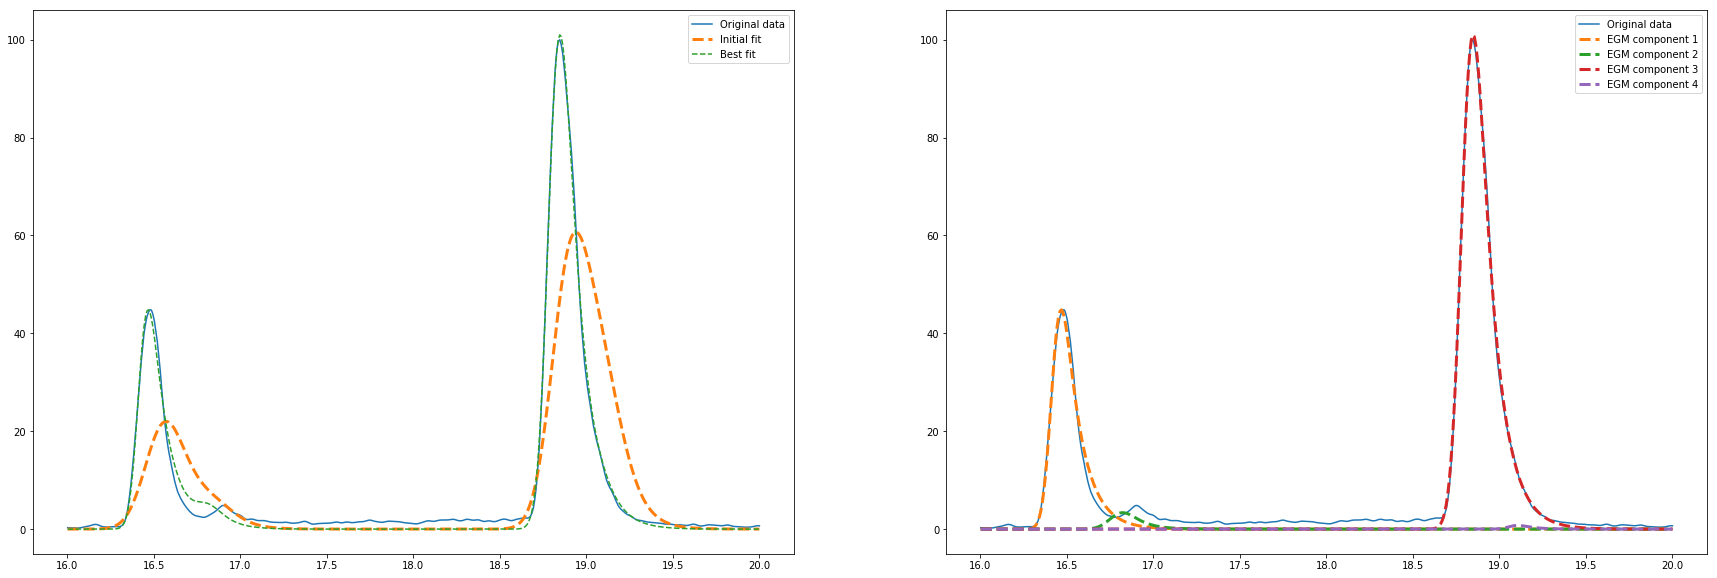

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 472
    # variables        = 16
    chi-square         = 813.896298
    reduced chi-square = 1.78486030
    Akaike info crit   = 289.171076
    Bayesian info crit = 355.682739
##  Warning: uncertainties could not be estimated:
    egm1_gamma:      at initial value
    egm1_gamma:      at boundary
    egm3_gamma:      at initial value
    egm3_gamma:      at boundary
[[Variables]]
    egm1_amplitude:  7.37155967 (init = 7)
    egm1_sigma:      0.04798052 (init = 0.1)
    egm1_center:     16.4167375 (init = 16.5)
    egm1_gamma:      10.0000000 (init = 10)
    egm1_height:     26.1096251 == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11298550 

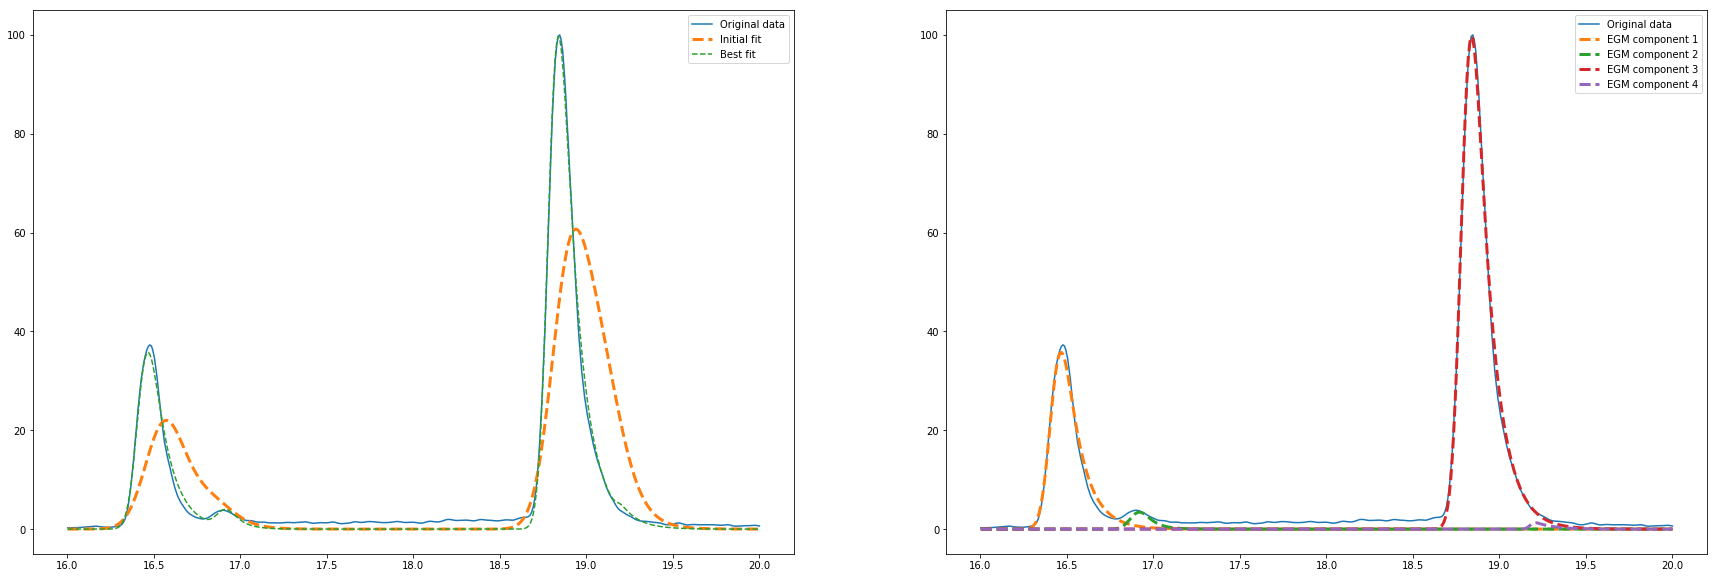

In [3]:
x = '5min'
df = pd.read_excel('ItaT_%s_65min_run_Ac.xlsx' % x, index_col=0)
auc['Toxins_5_min'] = {}
for i in range(1,4):
    x = df[16:20].index
    y_raw = df[16:20]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=16.5, min=16.3, max=16.7)
    params['egm1_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm1_amplitude'].set(value=7, min=1, max=10)
    params['egm1_gamma'].set(value=10, min=10, max = 18)

    params['egm2_center'].set(value=16.8, min=16.7, max=17.1)
    params['egm2_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm2_amplitude'].set(value=1, min=0.2, max=5)
    params['egm2_gamma'].set(value=13, min=10, max = 18)

    params['egm3_center'].set(value=18.85, min=18.7, max=18.95)
    params['egm3_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm3_amplitude'].set(value=18, min=5, max=30)
    params['egm3_gamma'].set(value=10, min=10, max = 18)

    params['egm4_center'].set(value=19.05, min=18.95, max=19.3)
    params['egm4_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm4_amplitude'].set(value=5, min=0.1, max=10)
    params['egm4_gamma'].set(value=13, min=10, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x)

    print(out.fit_report(min_correl=0.5))
    

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Toxins_5_min']['ItaT_Ac_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                     2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}

# 45 min AC

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 16
    # data points      = 471
    # variables        = 16
    chi-square         = 1727.05466
    reduced chi-square = 3.79572452
    Akaike info crit   = 643.977191
    Bayesian info crit = 710.454921
[[Variables]]
    egm1_amplitude:  10.2193064 +/- 0.12632064 (1.24%) (init = 10)
    egm1_sigma:      0.05069307 +/- 0.00156869 (3.09%) (init = 0.1)
    egm1_center:     16.4198275 +/- 0.00186033 (0.01%) (init = 16.5)
    egm1_gamma:      14.1450254 +/- 0.71632916 (5.06%) (init = 13)
    egm1_height:     44.2403653 +/- 0.75148196 (1.70%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11937306 +/- 0.00369399 (3.09%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  4

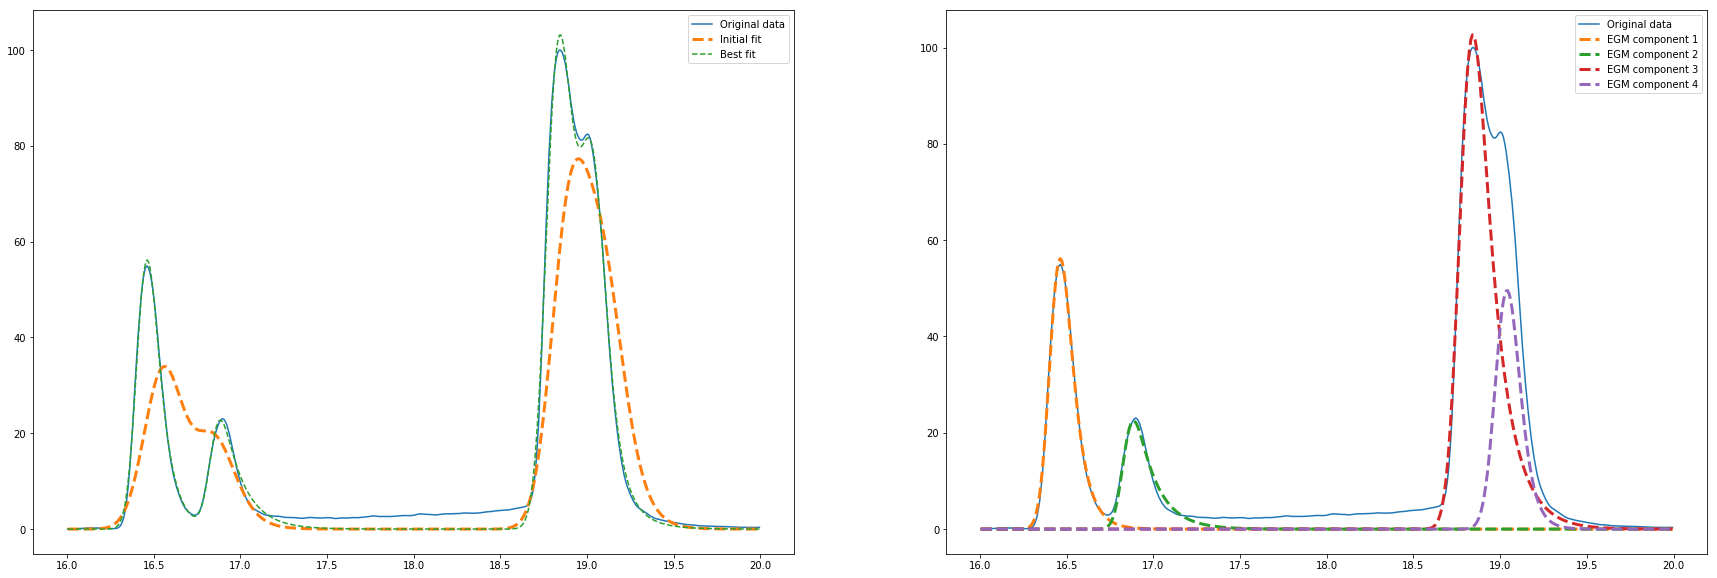

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 14
    # data points      = 471
    # variables        = 16
    chi-square         = 1286.37540
    reduced chi-square = 2.82719869
    Akaike info crit   = 505.225796
    Bayesian info crit = 571.703526
[[Variables]]
    egm1_amplitude:  10.3436488 +/- 0.10839405 (1.05%) (init = 10)
    egm1_sigma:      0.05372679 +/- 0.00140446 (2.61%) (init = 0.1)
    egm1_center:     16.4296131 +/- 0.00176883 (0.01%) (init = 16.5)
    egm1_gamma:      15.0642805 +/- 0.72826281 (4.83%) (init = 13)
    egm1_height:     45.2204422 +/- 0.67730231 (1.50%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.12651693 +/- 0.00330724 (2.61%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  4

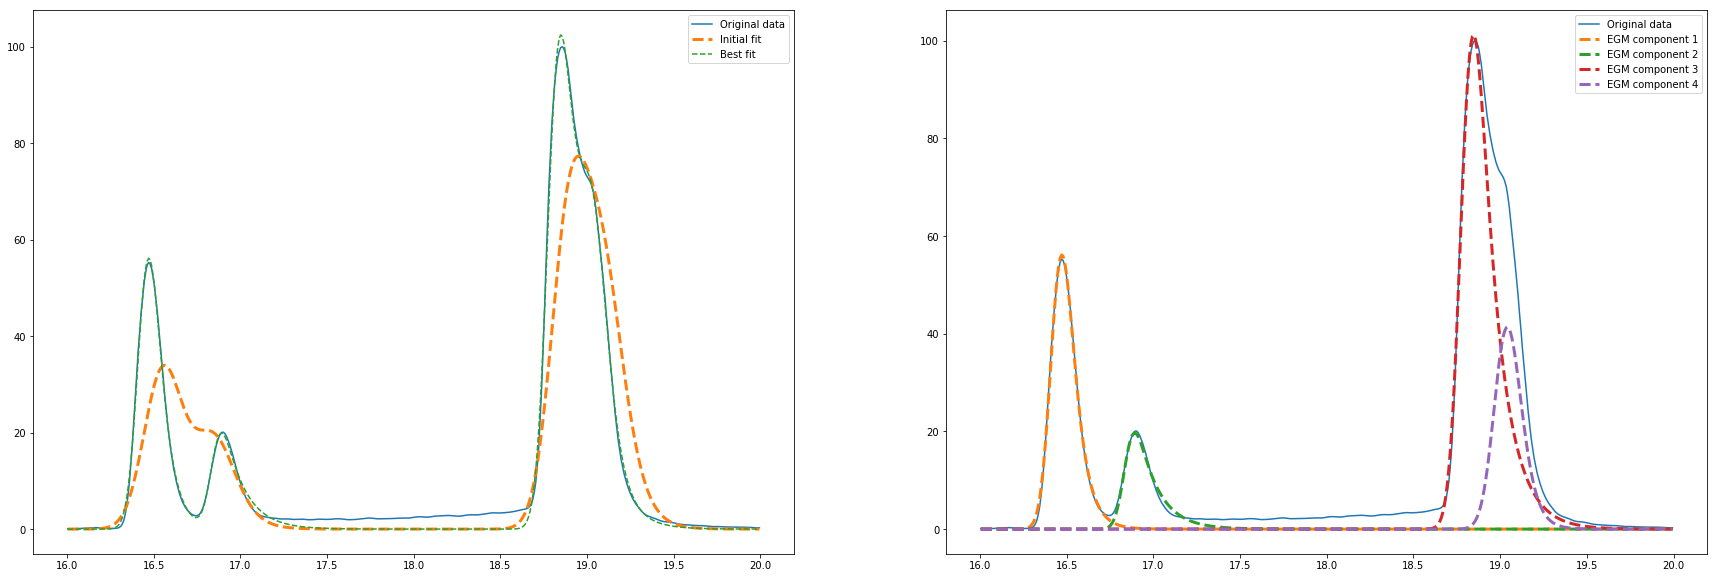

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 17
    # data points      = 471
    # variables        = 16
    chi-square         = 1285.98088
    reduced chi-square = 2.82633161
    Akaike info crit   = 505.081323
    Bayesian info crit = 571.559052
[[Variables]]
    egm1_amplitude:  7.83391436 +/- 0.10917123 (1.39%) (init = 10)
    egm1_sigma:      0.05020119 +/- 0.00175205 (3.49%) (init = 0.1)
    egm1_center:     16.4294631 +/- 0.00205299 (0.01%) (init = 16.5)
    egm1_gamma:      13.9256279 +/- 0.77456596 (5.56%) (init = 13)
    egm1_height:     33.7427975 +/- 0.64039396 (1.90%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11821476 +/- 0.00412577 (3.49%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  5

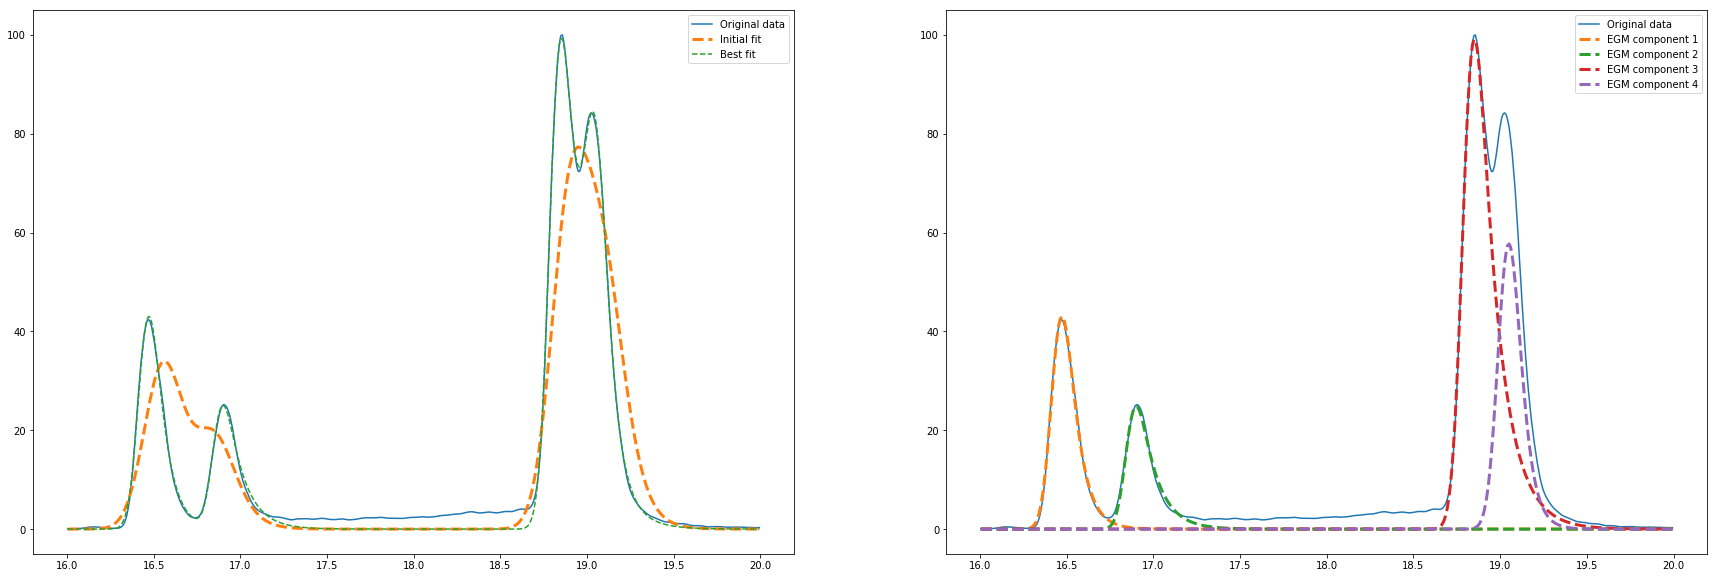

In [4]:
x = '45min'
df = pd.read_excel('ItaT_%s_65min_run_Ac.xlsx' % x, index_col=0)
auc['Toxins_45_min'] = {}
for i in range(1,4):
    x = df[16:20].index
    y_raw = df[16:20]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=16.5, min=16.3, max=16.7)
    params['egm1_sigma'].set(value=0.1, min=0.02)
    params['egm1_amplitude'].set(value=10, min=1, max=15)
    params['egm1_gamma'].set(value=13, min=8, max = 18)

    params['egm2_center'].set(value=16.8, min=16.7, max=17.1)
    params['egm2_sigma'].set(value=0.1, min=0.02)
    params['egm2_amplitude'].set(value=5, min=1, max=15)
    params['egm2_gamma'].set(value=13, min=8, max = 18)

    params['egm3_center'].set(value=18.85, min=18.7, max=18.95)
    params['egm3_sigma'].set(value=0.1, min=0.02)
    params['egm3_amplitude'].set(value=20, min=5, max=30)
    params['egm3_gamma'].set(value=13, min=8, max = 18)

    params['egm4_center'].set(value=19.05, min=19, max=19.3)
    params['egm4_sigma'].set(value=0.1, min=0.02)
    params['egm4_amplitude'].set(value=12, min=5, max=20)
    params['egm4_gamma'].set(value=13, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Toxins_45_min']['ItaT_Ac_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                                 2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}

# 45 min Ac 80 min run

## Ac pBAD33 RRF

In [5]:
deconv_fig = {}

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 11
    # data points      = 589
    # variables        = 16
    chi-square         = 1476.13550
    reduced chi-square = 2.57615270
    Akaike info crit   = 573.147648
    Bayesian info crit = 643.202467
[[Variables]]
    egm1_amplitude:  7.05606096 +/- 0.10528176 (1.49%) (init = 10)
    egm1_sigma:      0.05051738 +/- 0.00189564 (3.75%) (init = 0.1)
    egm1_center:     18.6510566 +/- 0.00213235 (0.01%) (init = 18.7)
    egm1_gamma:      12.9589340 +/- 0.71071527 (5.48%) (init = 13)
    egm1_height:     29.0416179 +/- 0.57298998 (1.97%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11895933 +/- 0.00446390 (3.75%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  6

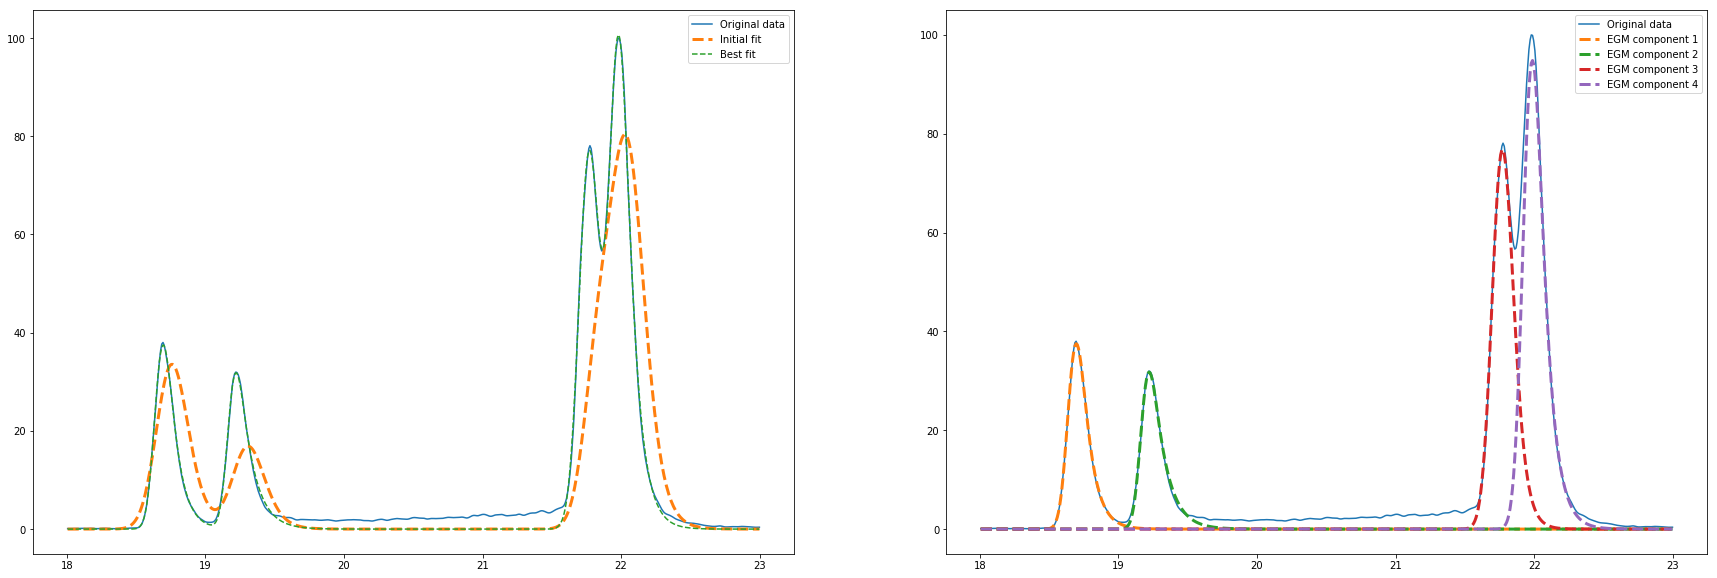

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 12
    # data points      = 589
    # variables        = 16
    chi-square         = 2359.07200
    reduced chi-square = 4.11705409
    Akaike info crit   = 849.294877
    Bayesian info crit = 919.349696
[[Variables]]
    egm1_amplitude:  7.06145111 +/- 0.13618193 (1.93%) (init = 10)
    egm1_sigma:      0.05456721 +/- 0.00263429 (4.83%) (init = 0.1)
    egm1_center:     18.6414999 +/- 0.00304390 (0.02%) (init = 18.7)
    egm1_gamma:      12.7040069 +/- 0.94999109 (7.48%) (init = 13)
    egm1_height:     27.8437363 +/- 0.72244649 (2.59%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.12849595 +/- 0.00620329 (4.83%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  7

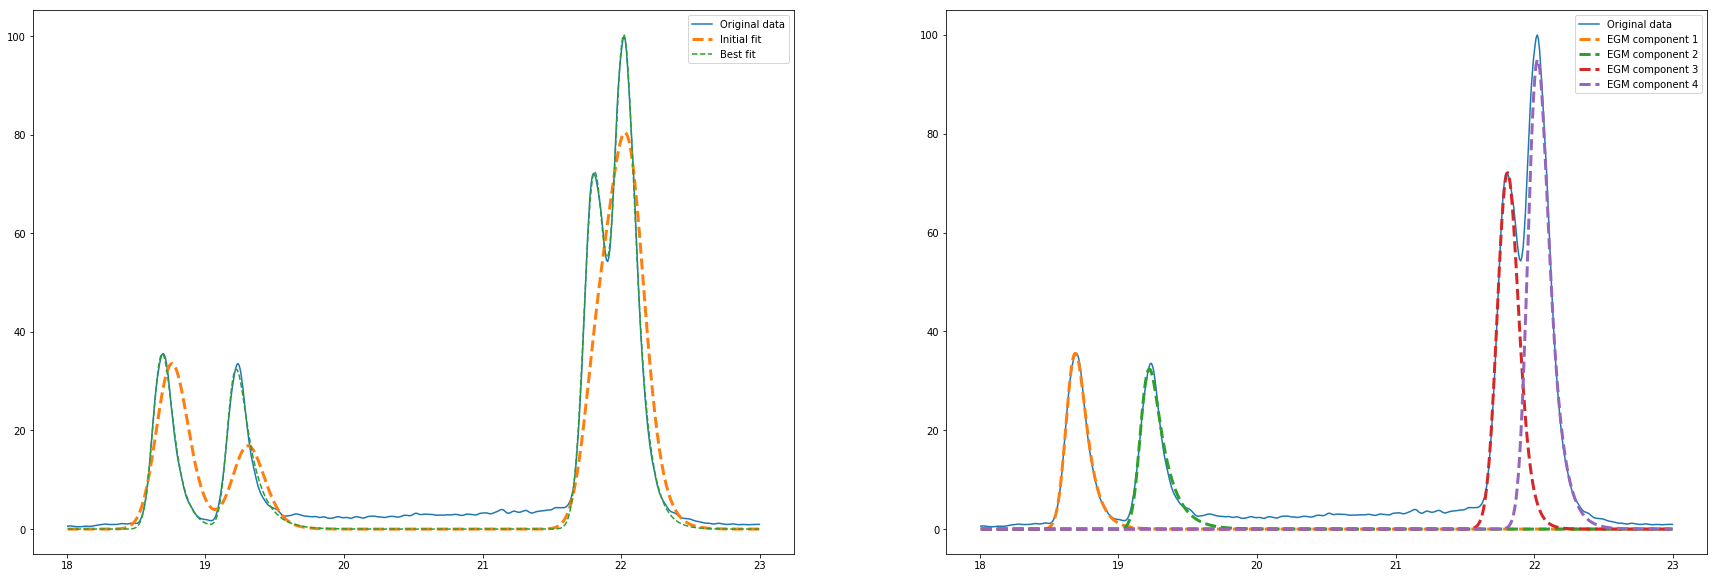

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 19
    # data points      = 589
    # variables        = 16
    chi-square         = 1849.08929
    reduced chi-square = 3.22703192
    Akaike info crit   = 705.829157
    Bayesian info crit = 775.883975
[[Variables]]
    egm1_amplitude:  7.31188074 +/- 0.11581490 (1.58%) (init = 10)
    egm1_sigma:      0.05221802 +/- 0.00206031 (3.95%) (init = 0.1)
    egm1_center:     18.6660657 +/- 0.00244257 (0.01%) (init = 18.7)
    egm1_gamma:      14.0788814 +/- 0.90943414 (6.46%) (init = 13)
    egm1_height:     31.1740546 +/- 0.67416233 (2.16%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.12296404 +/- 0.00485167 (3.95%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  7

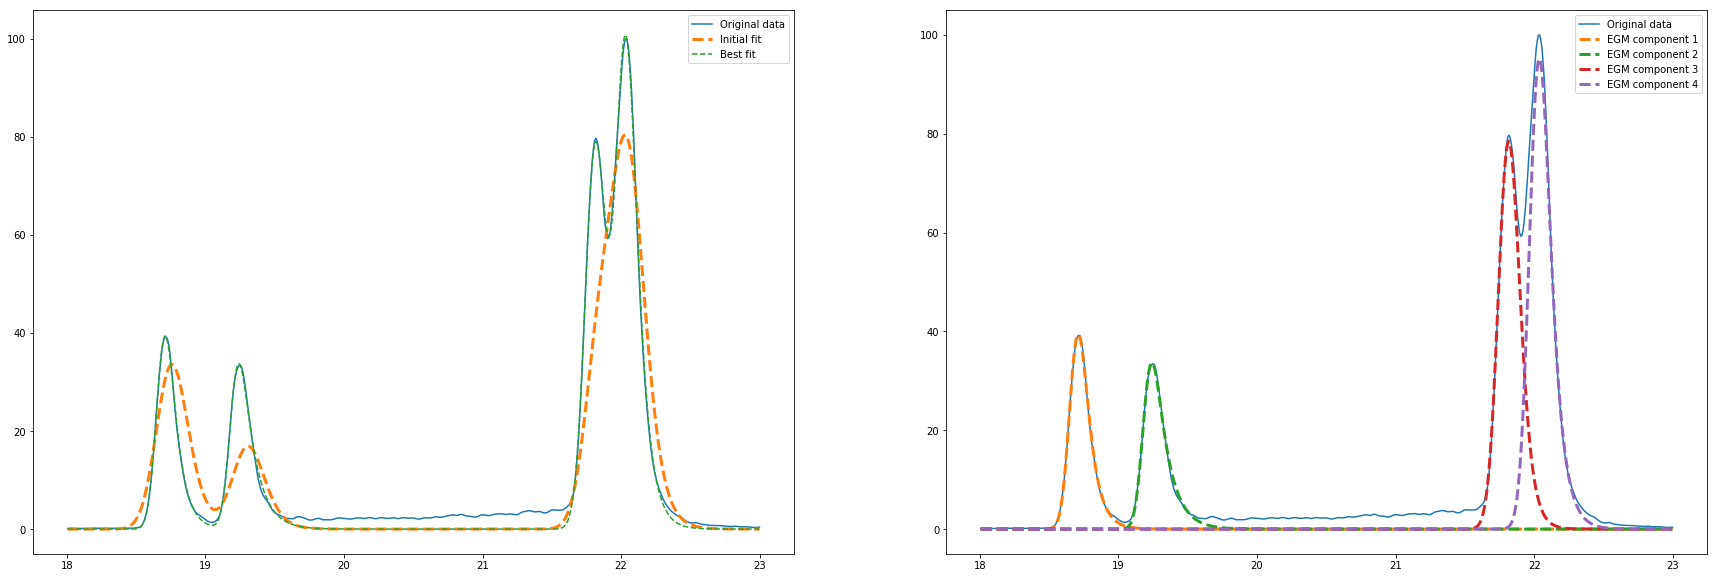

In [6]:
x = '45min'
df = pd.read_excel('pBAD33calibr_%s_80min_run_Ac.xlsx' % x, index_col=0)
auc['Control_45_min'] = {}
for i in range(1,4):
    
    x = df[18:23].index
    y_raw = df[18:23]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=18.7, min=18.5, max=18.9)
    params['egm1_sigma'].set(value=0.1, min=0.02)
    params['egm1_amplitude'].set(value=10, min=1, max=15)
    params['egm1_gamma'].set(value=13, min=8, max = 18)

    params['egm2_center'].set(value=19.25, min=19.05, max=19.45)
    params['egm2_sigma'].set(value=0.1, min=0.02)
    params['egm2_amplitude'].set(value=5, min=1, max=15)
    params['egm2_gamma'].set(value=13, min=8, max = 18)

    params['egm3_center'].set(value=21.8, min=21.6, max=21.9)
    params['egm3_sigma'].set(value=0.1, min=0.02)
    params['egm3_amplitude'].set(value=12, min=5, max=40)
    params['egm3_gamma'].set(value=13, min=8, max = 18)

    params['egm4_center'].set(value=22, min=21.9, max=22.3)
    params['egm4_sigma'].set(value=0.1, min=0.02)
    params['egm4_amplitude'].set(value=20, min=5, max=40)
    params['egm4_gamma'].set(value=13, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Control_45_min']['Ac_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                             2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}
    if i==2:
        df_out = pd.DataFrame({'Signal' : y_raw, 'Fit' : out.best_fit, 'Ile/Leu 1' : (comps['egm1_'] + comps['egm3_'])*scale/100, 'Ile/Leu 2' : (comps['egm2_'] + comps['egm4_'])*scale/100})
        deconv_fig['Control_45min_Ac'] = df_out

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 20
    # data points      = 589
    # variables        = 16
    chi-square         = 26570.8261
    reduced chi-square = 46.3714243
    Akaike info crit   = 2275.58520
    Bayesian info crit = 2345.64001
[[Variables]]
    egm1_amplitude:  7.29978373 +/- 0.46157969 (6.32%) (init = 8)
    egm1_sigma:      0.04740821 +/- 0.00771173 (16.27%) (init = 0.08)
    egm1_center:     18.6553195 +/- 0.00807741 (0.04%) (init = 18.7)
    egm1_gamma:      11.4540255 +/- 2.31541448 (20.21%) (init = 13)
    egm1_height:     28.4442084 +/- 2.27836644 (8.01%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11163780 +/- 0.01815973 (16.27%) == '2.3548200*egm1_sigma'
    egm2_amplitude:

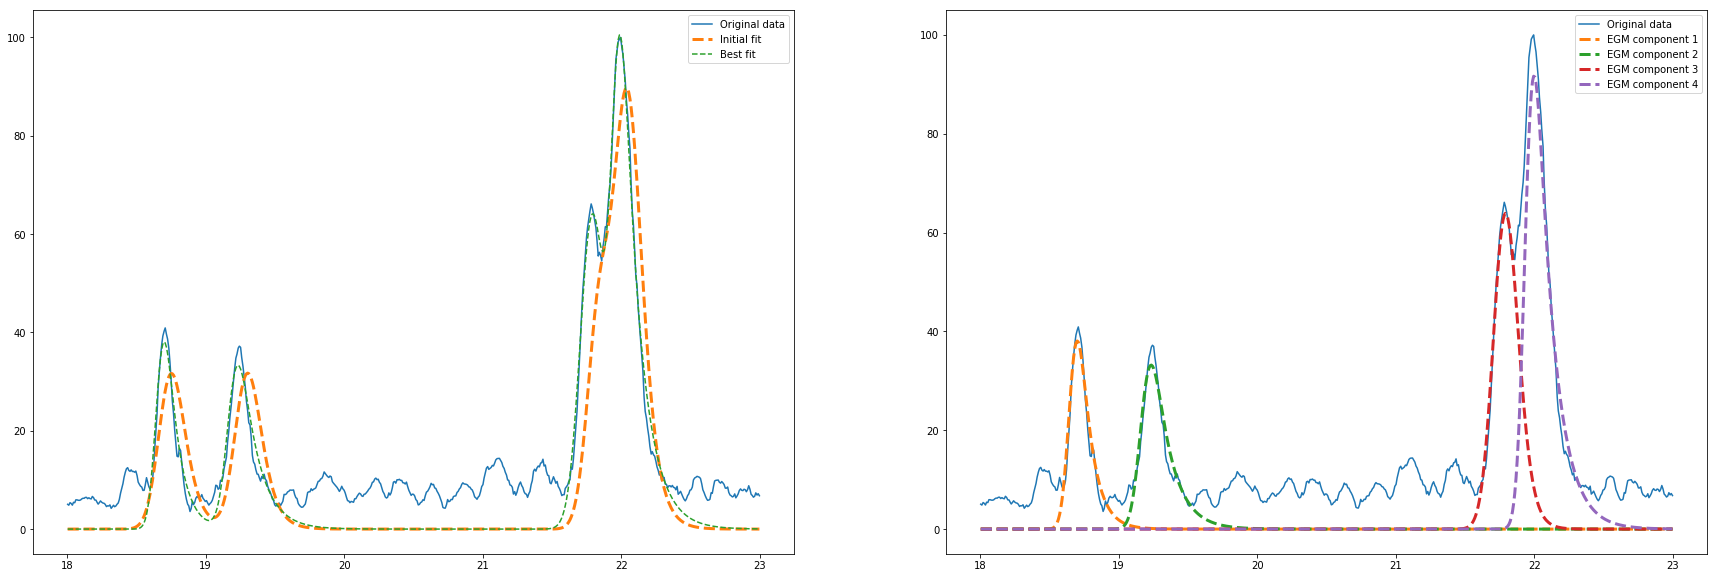

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 17
    # data points      = 589
    # variables        = 16
    chi-square         = 38105.3089
    reduced chi-square = 66.5014117
    Akaike info crit   = 2487.94312
    Bayesian info crit = 2557.99793
[[Variables]]
    egm1_amplitude:  9.31680806 +/- 0.79624254 (8.55%) (init = 8)
    egm1_sigma:      0.10000000 +/- 0.02110847 (21.11%) (init = 0.08)
    egm1_center:     18.6307274 +/- 0.02820913 (0.15%) (init = 18.7)
    egm1_gamma:      8.00000000 +/- 3.49755676 (43.72%) (init = 13)
    egm1_height:     21.7455755 +/- 2.78963706 (12.83%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.23548200 +/- 0.04970665 (21.11%) == '2.3548200*egm1_sigma'
    egm2_amplitude

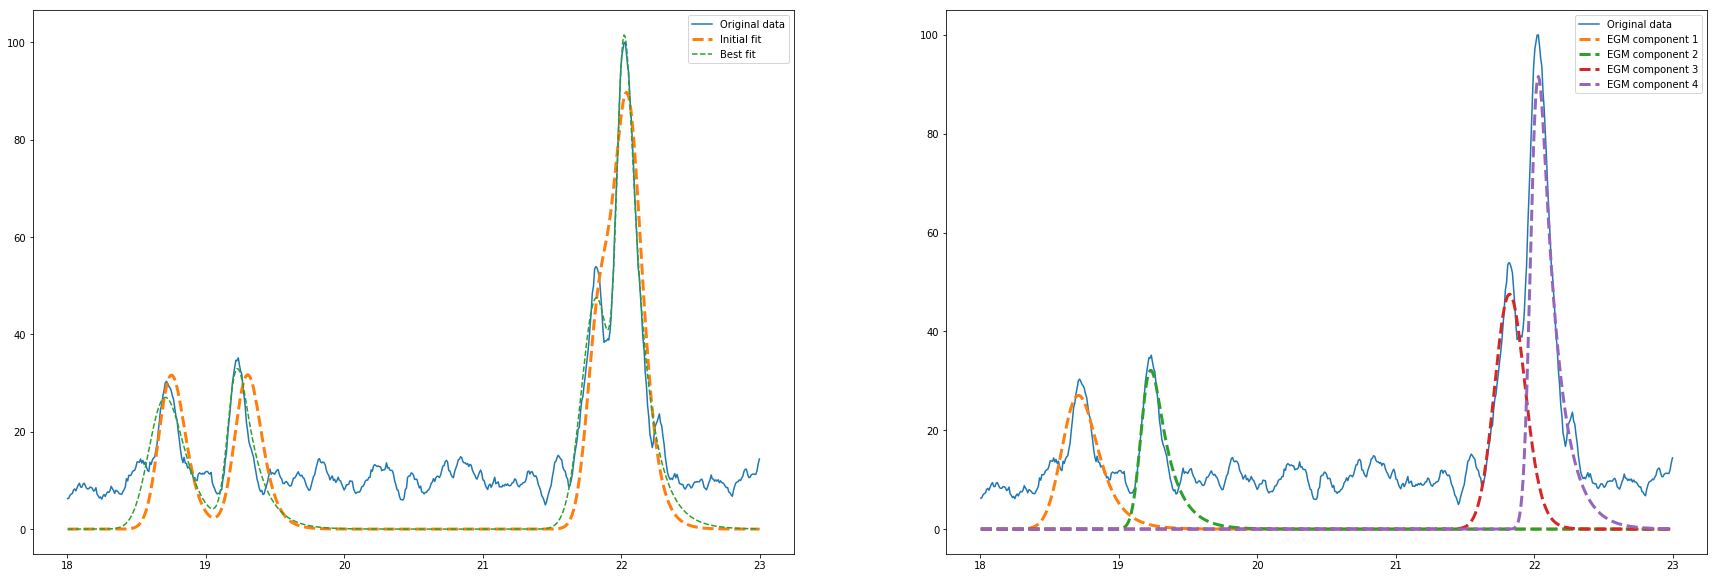

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 14
    # data points      = 589
    # variables        = 16
    chi-square         = 30544.6799
    reduced chi-square = 53.3065967
    Akaike info crit   = 2357.67806
    Bayesian info crit = 2427.73288
[[Variables]]
    egm1_amplitude:  9.11088826 +/- 0.83957117 (9.22%) (init = 8)
    egm1_sigma:      0.10000000 +/- 0.02104158 (21.04%) (init = 0.08)
    egm1_center:     18.6116180 +/- 0.03020960 (0.16%) (init = 18.7)
    egm1_gamma:      8.00000000 +/- 3.97262089 (49.66%) (init = 13)
    egm1_height:     21.2649554 +/- 2.95048170 (13.87%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.23548200 +/- 0.04954914 (21.04%) == '2.3548200*egm1_sigma'
    egm2_amplitude

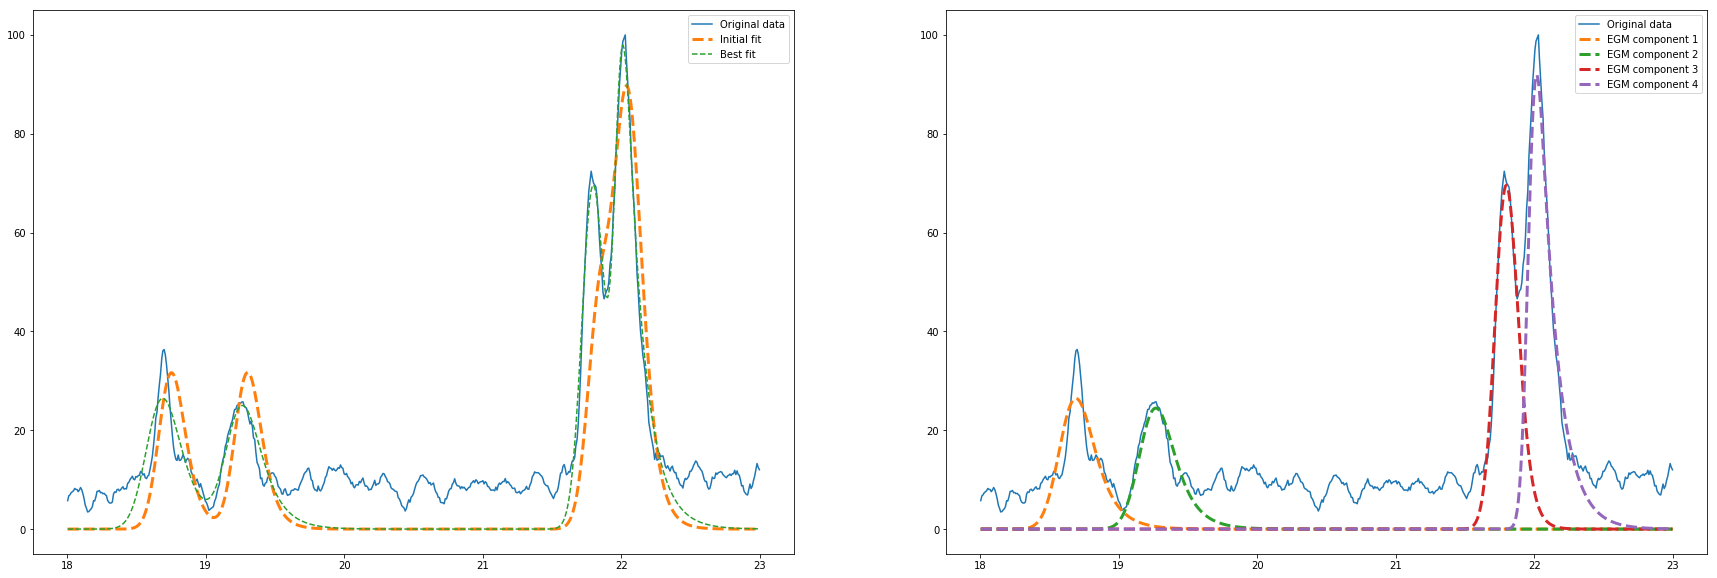

In [7]:
x = '45min'
df = pd.read_excel('pBAD33calibr_%s_80min_run_Fmoc_trace_Ac.xlsx' % x, index_col=0)

for i in range(1,4):
    
    x = df[18:23].index
    y_raw = df[18:23]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=18.7, min=18.5, max=18.9)
    params['egm1_sigma'].set(value=0.08, min=0.02, max=0.1)
    params['egm1_amplitude'].set(value=8, min=1, max=15)
    params['egm1_gamma'].set(value=13, min=8, max = 18)

    params['egm2_center'].set(value=19.25, min=19.05, max=19.45)
    params['egm2_sigma'].set(value=0.08, min=0.02, max=0.1)
    params['egm2_amplitude'].set(value=8, min=1, max=15)
    params['egm2_gamma'].set(value=13, min=8, max = 18)

    params['egm3_center'].set(value=21.8, min=21.6, max=21.9)
    params['egm3_sigma'].set(value=0.08, min=0.02, max=0.1)
    params['egm3_amplitude'].set(value=12, min=5, max=40)
    params['egm3_gamma'].set(value=13, min=8, max = 18)

    params['egm4_center'].set(value=22, min=21.9, max=22.3)
    params['egm4_sigma'].set(value=0.08, min=0.02, max=0.1)
    params['egm4_amplitude'].set(value=20, min=5, max=40)
    params['egm4_gamma'].set(value=13, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Control_45_min']['Fmoc_trace_Ac' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                             2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}

## Ac ItaT

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 14
    # data points      = 589
    # variables        = 16
    chi-square         = 1687.05754
    reduced chi-square = 2.94425401
    Akaike info crit   = 651.813540
    Bayesian info crit = 721.868359
[[Variables]]
    egm1_amplitude:  6.98820951 +/- 0.11086910 (1.59%) (init = 10)
    egm1_sigma:      0.05387527 +/- 0.00212777 (3.95%) (init = 0.1)
    egm1_center:     18.7105374 +/- 0.00258222 (0.01%) (init = 18.7)
    egm1_gamma:      14.3162461 +/- 0.97239901 (6.79%) (init = 13)
    egm1_height:     29.6704070 +/- 0.65364352 (2.20%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.12686656 +/- 0.00501051 (3.95%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  4

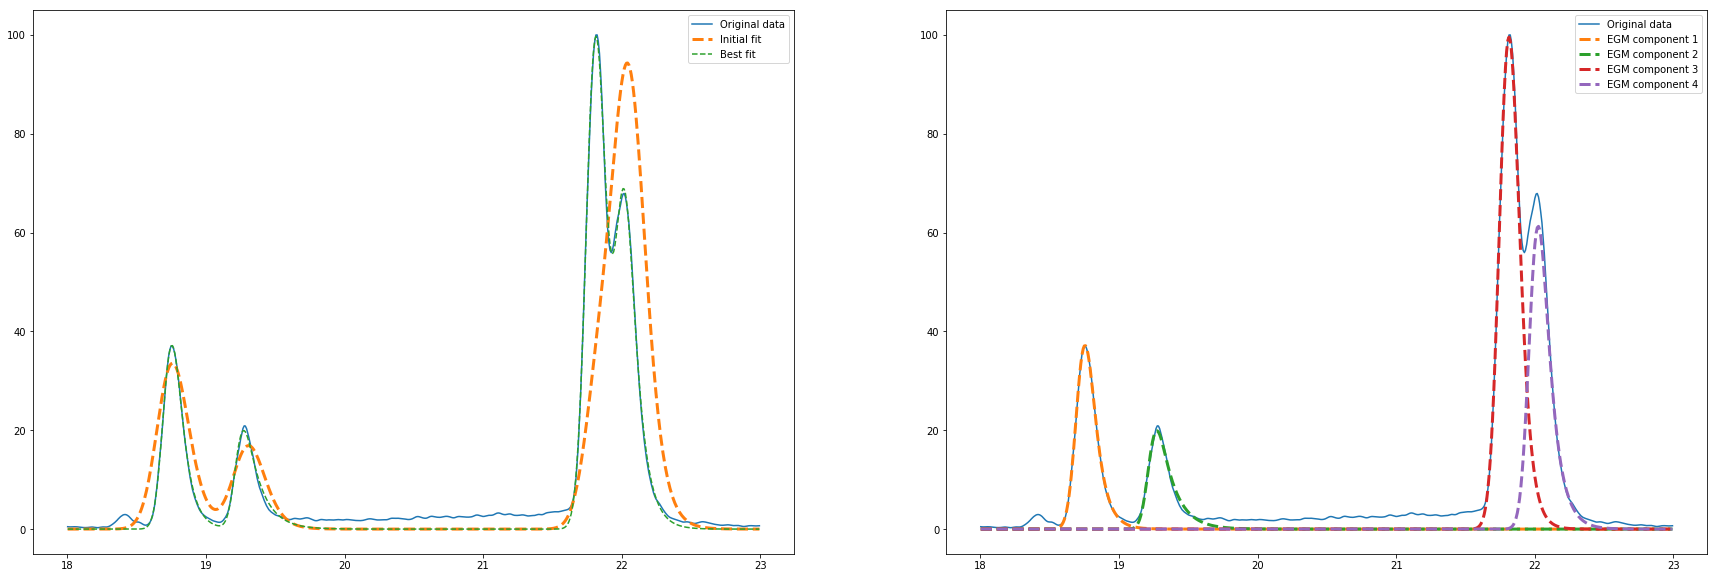

In [8]:
x = '45min'
df = pd.read_excel('ItaT_%s_80min_run_Ac.xlsx' % x, index_col=0)
for i in range(1,2):
    x = df[18:23].index
    y_raw = y = df[18:23]['"%i"' % i]
    scale = max(y_raw)
    y = y*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=18.7, min=18.5, max=18.9)
    params['egm1_sigma'].set(value=0.1, min=0.02)
    params['egm1_amplitude'].set(value=10, min=1, max=15)
    params['egm1_gamma'].set(value=13, min=8, max = 18)

    params['egm2_center'].set(value=19.25, min=19.05, max=19.45)
    params['egm2_sigma'].set(value=0.1, min=0.02)
    params['egm2_amplitude'].set(value=5, min=1, max=15)
    params['egm2_gamma'].set(value=13, min=8, max = 18)

    params['egm3_center'].set(value=21.8, min=21.6, max=21.9)
    params['egm3_sigma'].set(value=0.1, min=0.02)
    params['egm3_amplitude'].set(value=10, min=5, max=40)
    params['egm3_gamma'].set(value=13, min=8, max = 18)

    params['egm4_center'].set(value=22, min=21.9, max=22.3)
    params['egm4_sigma'].set(value=0.1, min=0.02)
    params['egm4_amplitude'].set(value=25, min=5, max=40)
    params['egm4_gamma'].set(value=13, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    if i==1:
        df_out = pd.DataFrame({'Signal' : y_raw, 'Fit' : out.best_fit, 'Ile/Leu 1' : (comps['egm1_'] + comps['egm3_'])*scale/100, 'Ile/Leu 2' : (comps['egm2_'] + comps['egm4_'])*scale/100})
        deconv_fig['ItaT_45min_Ac'] = df_out

# 5 min Fmoc

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 175
    # data points      = 471
    # variables        = 16
    chi-square         = 1245.93012
    reduced chi-square = 2.73830795
    Akaike info crit   = 490.179153
    Bayesian info crit = 556.656882
[[Variables]]
    egm1_amplitude:  1.09090366 +/- 0.37219680 (34.12%) (init = 3)
    egm1_sigma:      0.03843732 +/- 0.01193438 (31.05%) (init = 0.1)
    egm1_center:     31.9925979 +/- 0.02005337 (0.06%) (init = 32)
    egm1_gamma:      17.9864209 +/- 20.0944058 (111.72%) (init = 10)
    egm1_height:     6.09685207 +/- 1.48447129 (24.35%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.09051297 +/- 0.02810332 (31.05%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  6.6

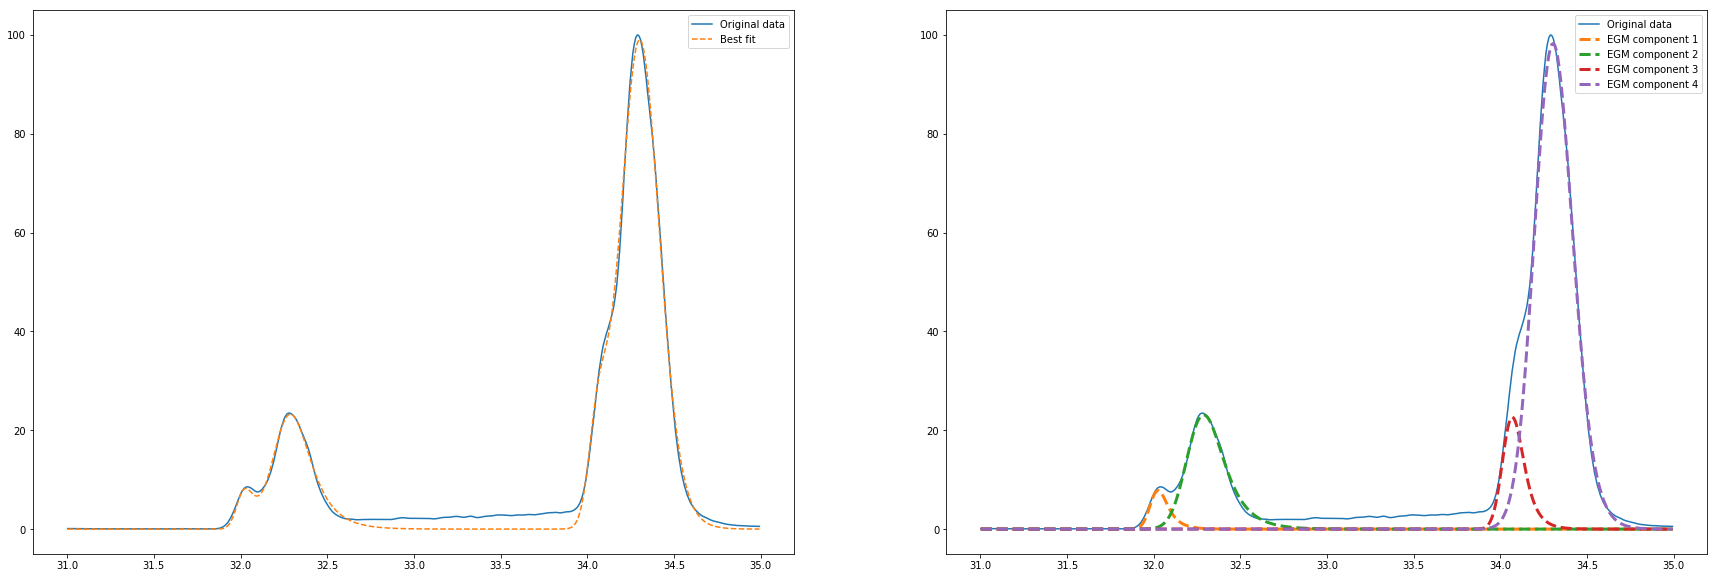

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 140
    # data points      = 471
    # variables        = 16
    chi-square         = 2357.11942
    reduced chi-square = 5.18048224
    Akaike info crit   = 790.468950
    Bayesian info crit = 856.946679
[[Variables]]
    egm1_amplitude:  4.03065471 +/- 1.86193203 (46.19%) (init = 3)
    egm1_sigma:      0.04909009 +/- 0.01086776 (22.14%) (init = 0.1)
    egm1_center:     31.9834487 +/- 0.01899072 (0.06%) (init = 32)
    egm1_gamma:      8.00000148 +/- 7.87840544 (98.48%) (init = 10)
    egm1_height:     12.0952411 +/- 2.69467950 (22.28%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.11559833 +/- 0.02559161 (22.14%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  9.45

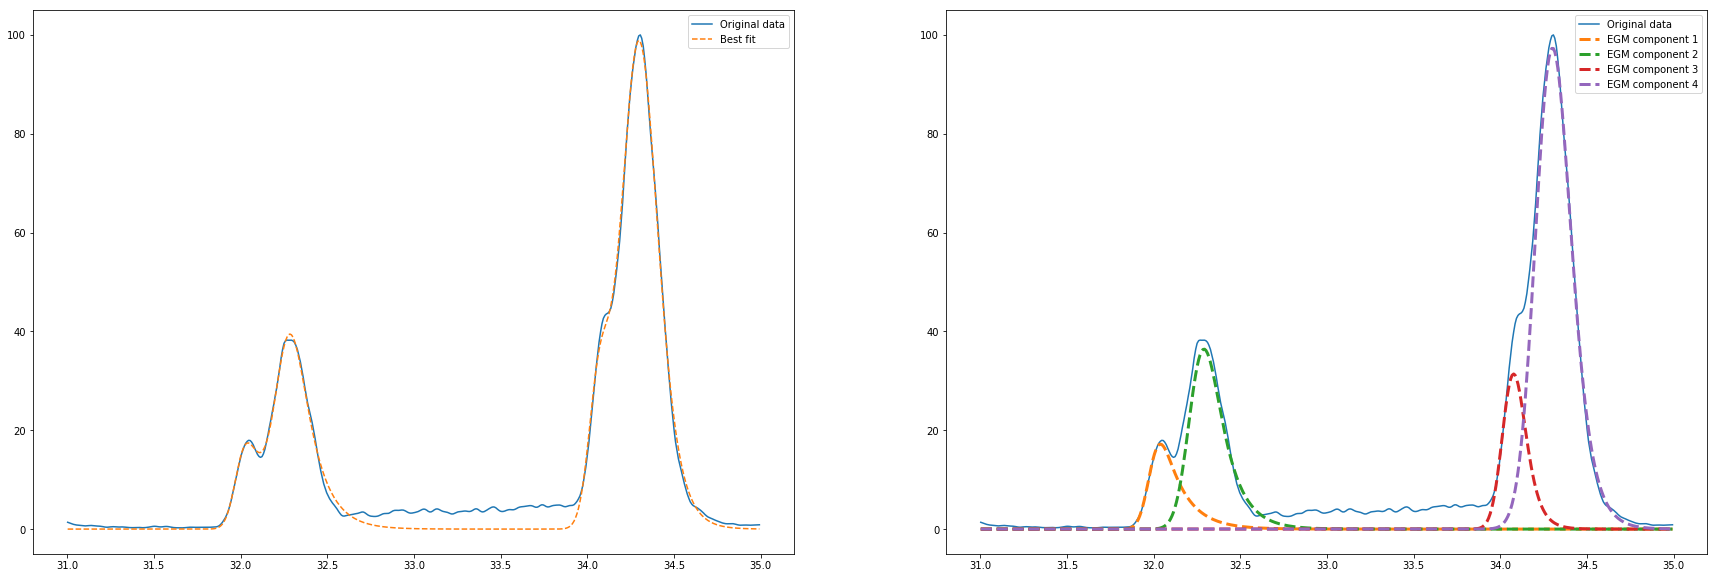

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 471
    # variables        = 16
    chi-square         = 1880.02001
    reduced chi-square = 4.13191210
    Akaike info crit   = 683.948593
    Bayesian info crit = 750.426323
[[Variables]]
    egm1_amplitude:  2.41464380 +/- 1.58374664 (65.59%) (init = 3)
    egm1_sigma:      0.06910749 +/- 0.02860517 (41.39%) (init = 0.1)
    egm1_center:     31.9934506 +/- 0.08984348 (0.28%) (init = 32)
    egm1_gamma:      16.8635143 +/- 58.6907851 (348.03%) (init = 10)
    egm1_height:     9.79101498 +/- 5.94659966 (60.74%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.16273570 +/- 0.06736002 (41.39%) == '2.3548200*egm1_sigma'
    egm2_amplitude:  8.5

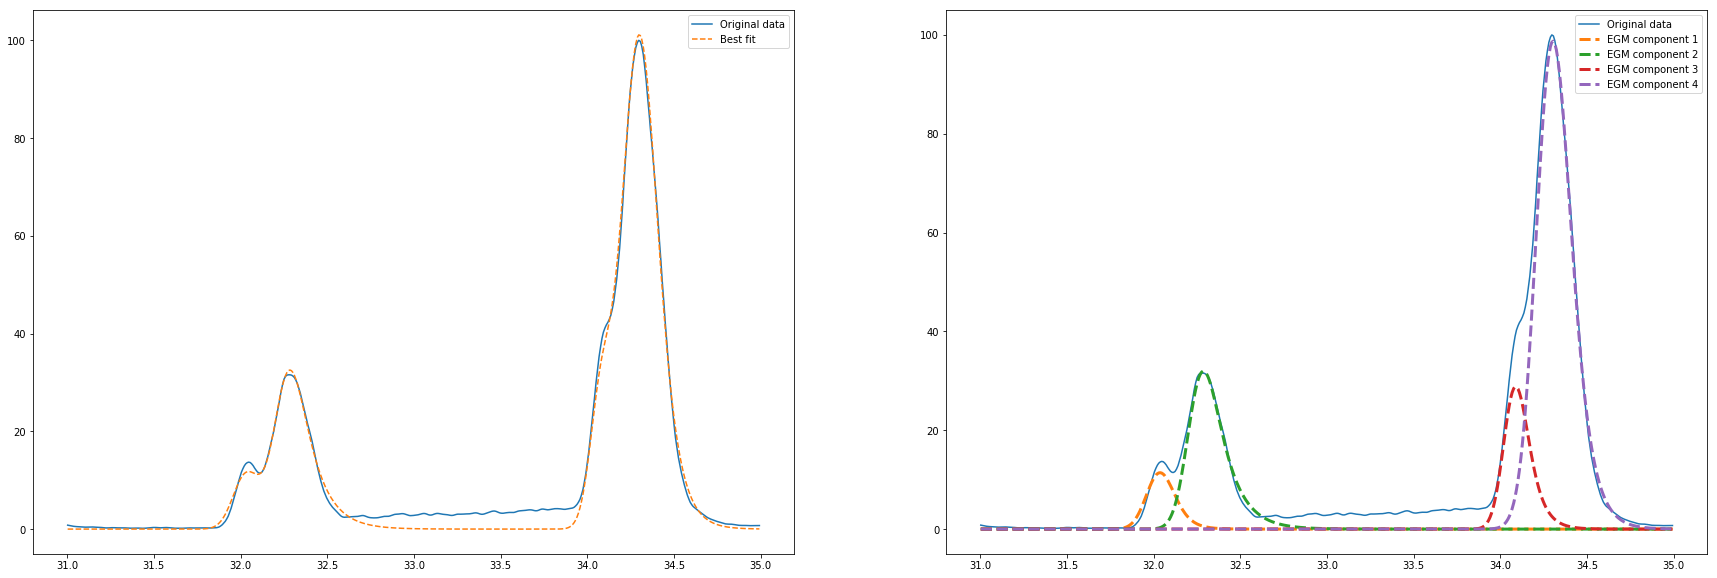

In [9]:
x = '5min'
df = pd.read_excel('ItaT_%s_65min_run_Fmoc.xlsx' % x, index_col=0)
for i in range(1,4):
    x = df[31:35].index
    y_raw = df[31:35]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=32, min=31.9, max=32.1)
    params['egm1_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm1_amplitude'].set(value=3, min=1, max=15)
    params['egm1_gamma'].set(value=10, min=8, max = 18)

    params['egm2_center'].set(value=32.2, min=32.1, max=32.5)
    params['egm2_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm2_amplitude'].set(value=8, min=1, max=15)
    params['egm2_gamma'].set(value=10, min=8, max = 18)

    params['egm3_center'].set(value=34.1, min=34, max=34.2)
    params['egm3_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm3_amplitude'].set(value=10, min=1, max=20)
    params['egm3_gamma'].set(value=16, min=8, max = 18)

    params['egm4_center'].set(value=34.3, min=34.2, max=34.5)
    params['egm4_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm4_amplitude'].set(value=25, min=5, max=30)
    params['egm4_gamma'].set(value=10, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x)

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    #axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Toxins_5_min']['ItaT_Fmoc_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                           2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}

# 45 min Fmoc

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 142
    # data points      = 471
    # variables        = 16
    chi-square         = 2183.62891
    reduced chi-square = 4.79918442
    Akaike info crit   = 754.459984
    Bayesian info crit = 820.937714
[[Variables]]
    egm1_amplitude:  0.31461489 +/- 1.98776432 (631.81%) (init = 1)
    egm1_sigma:      0.05953321 +/- 0.19590520 (329.07%) (init = 0.1)
    egm1_center:     31.9824115 +/- 0.38772376 (1.21%) (init = 32)
    egm1_gamma:      8.00000556 +/- 126.136863 (1576.71%) (init = 13)
    egm1_height:     0.89352216 +/- 3.36512887 (376.61%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.14018998 +/- 0.46132148 (329.07%) == '2.3548200*egm1_sigma'
    egm2_amplitude:

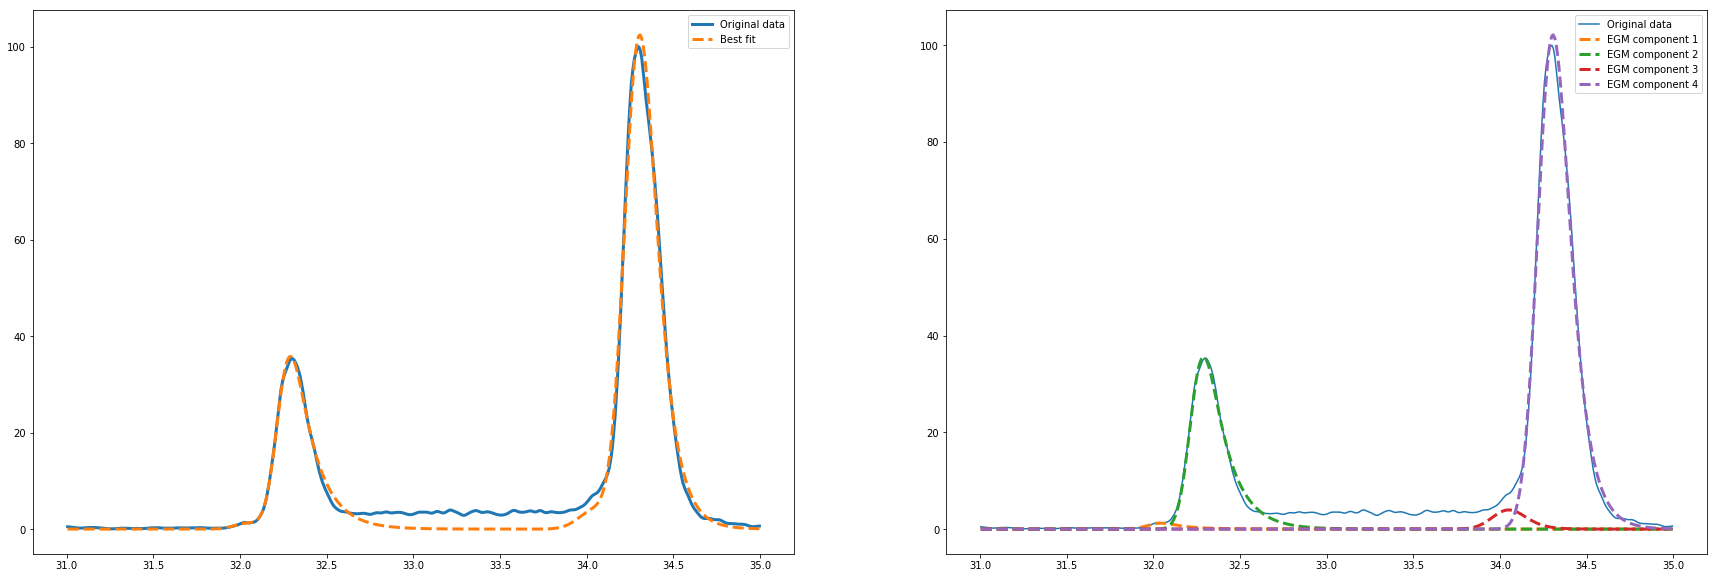

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 471
    # variables        = 16
    chi-square         = 2686.30870
    reduced chi-square = 5.90397517
    Akaike info crit   = 852.041712
    Bayesian info crit = 918.519442
[[Variables]]
    egm1_amplitude:  0.34289477 +/- 0.83192146 (242.62%) (init = 1)
    egm1_sigma:      0.06705240 +/- 0.15590585 (232.51%) (init = 0.1)
    egm1_center:     31.9729158 +/- 0.43614701 (1.36%) (init = 32)
    egm1_gamma:      16.5997050 +/- 250.704768 (1510.30%) (init = 13)
    egm1_height:     1.40482069 +/- 4.32965989 (308.20%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.15789633 +/- 0.36713021 (232.51%) == '2.3548200*egm1_sigma'
    egm2_amplitude: 

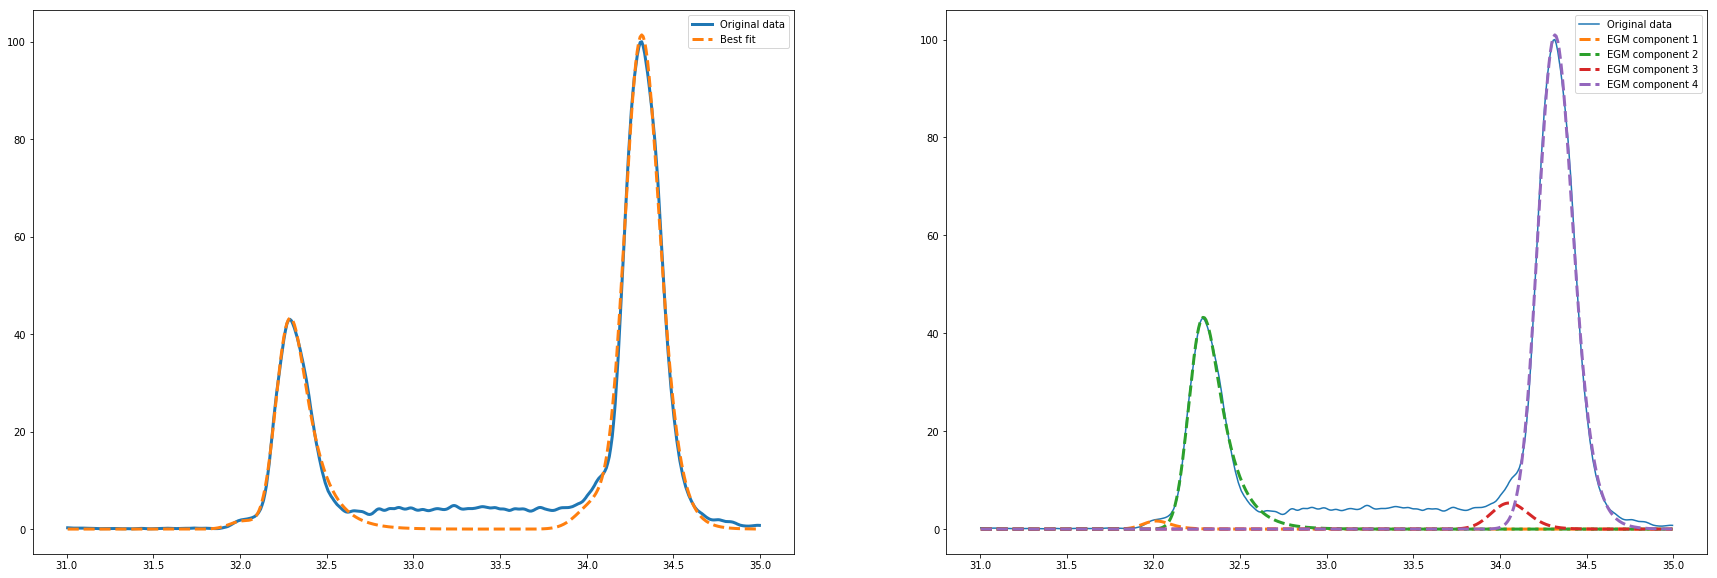

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 403
    # data points      = 471
    # variables        = 16
    chi-square         = 1603.01896
    reduced chi-square = 3.52311860
    Akaike info crit   = 608.874153
    Bayesian info crit = 675.351883
[[Variables]]
    egm1_amplitude:  0.22971769 +/- 0.90284364 (393.02%) (init = 1)
    egm1_sigma:      0.05264276 +/- 0.15266079 (289.99%) (init = 0.1)
    egm1_center:     31.9812298 +/- 0.26714181 (0.84%) (init = 32)
    egm1_gamma:      9.54634542 +/- 104.749044 (1097.27%) (init = 13)
    egm1_height:     0.76545198 +/- 2.14963575 (280.83%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.12396422 +/- 0.35948869 (289.99%) == '2.3548200*egm1_sigma'
    egm2_amplitude:

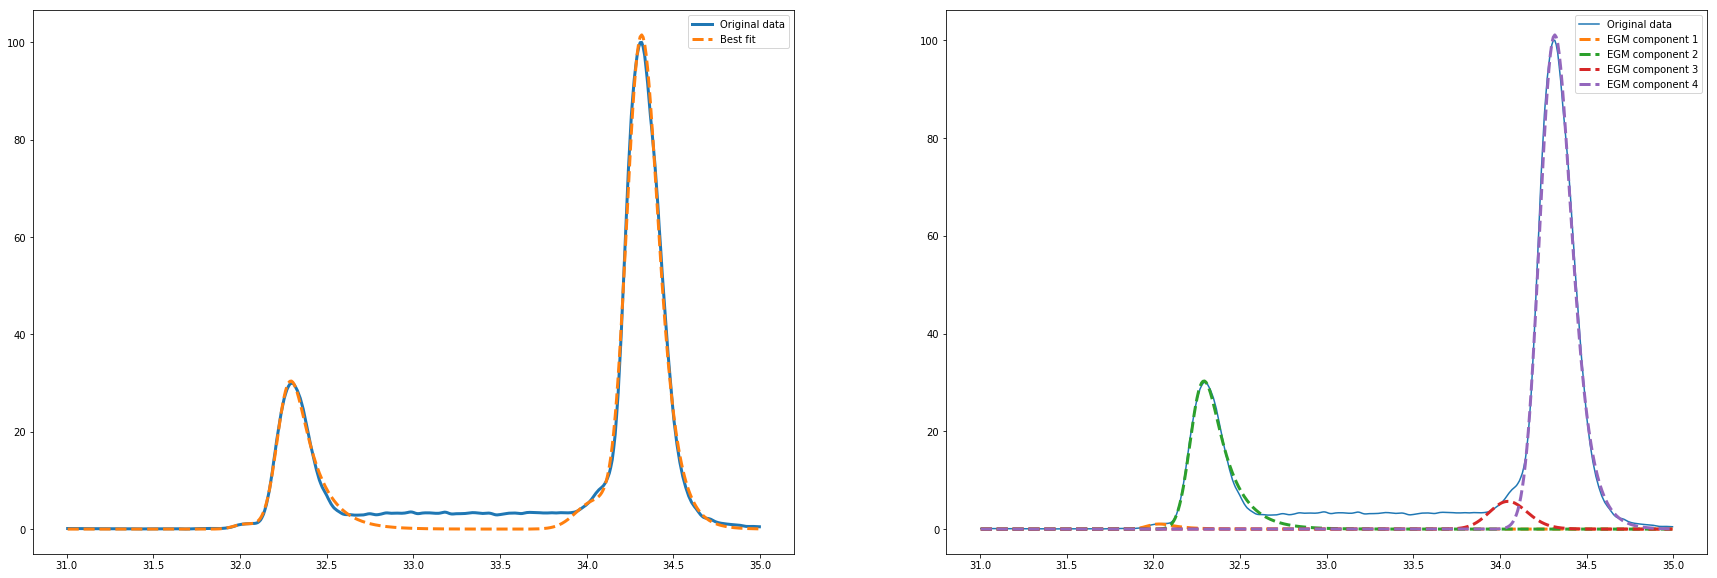

In [10]:
x = '45min'
df = pd.read_excel('ItaT_%s_65min_run_Fmoc.xlsx' % x, index_col=0)
for i in range(1,4):
    x = df[31:35].index
    y_raw = df[31:35]['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=32, min=31.9, max=32.1)
    params['egm1_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm1_amplitude'].set(value=1, min=0.2, max=15)
    params['egm1_gamma'].set(value=13, min=8, max = 18)

    params['egm2_center'].set(value=32.2, min=32.1, max=32.5)
    params['egm2_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm2_amplitude'].set(value=8, min=1, max=15)
    params['egm2_gamma'].set(value=10, min=8, max = 18)

    params['egm3_center'].set(value=34.1, min=34, max=34.2)
    params['egm3_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm3_amplitude'].set(value=2, min=1, max=20)
    params['egm3_gamma'].set(value=16, min=8, max = 18)

    params['egm4_center'].set(value=34.3, min=34.2, max=34.5)
    params['egm4_sigma'].set(value=0.1, max=0.1, min=0.02)
    params['egm4_amplitude'].set(value=30, min=5, max=40)
    params['egm4_gamma'].set(value=10, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x)

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data', linewidth=3)
    #axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit', linewidth=3)
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Toxins_45_min']['ItaT_Fmoc_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                              2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}

# 45 min Fmoc 80 min run

## Fmoc pBAD33 RRF

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 1178
    # variables        = 16
    chi-square         = 1712.13036
    reduced chi-square = 1.47343405
    Akaike info crit   = 472.478157
    Bayesian info crit = 553.623331
[[Variables]]
    egm1_amplitude:  3.69260926 +/- 0.33729510 (9.13%) (init = 3)
    egm1_sigma:      0.07290382 +/- 0.00792165 (10.87%) (init = 0.1)
    egm1_center:     38.6234862 +/- 0.01774246 (0.05%) (init = 38.65)
    egm1_gamma:      13.7830330 +/- 7.35032511 (53.33%) (init = 10)
    egm1_height:     13.2793859 +/- 1.52215999 (11.46%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.17167538 +/- 0.01865405 (10.87%) == '2.3548200*egm1_sigma'
    egm2_amplitud

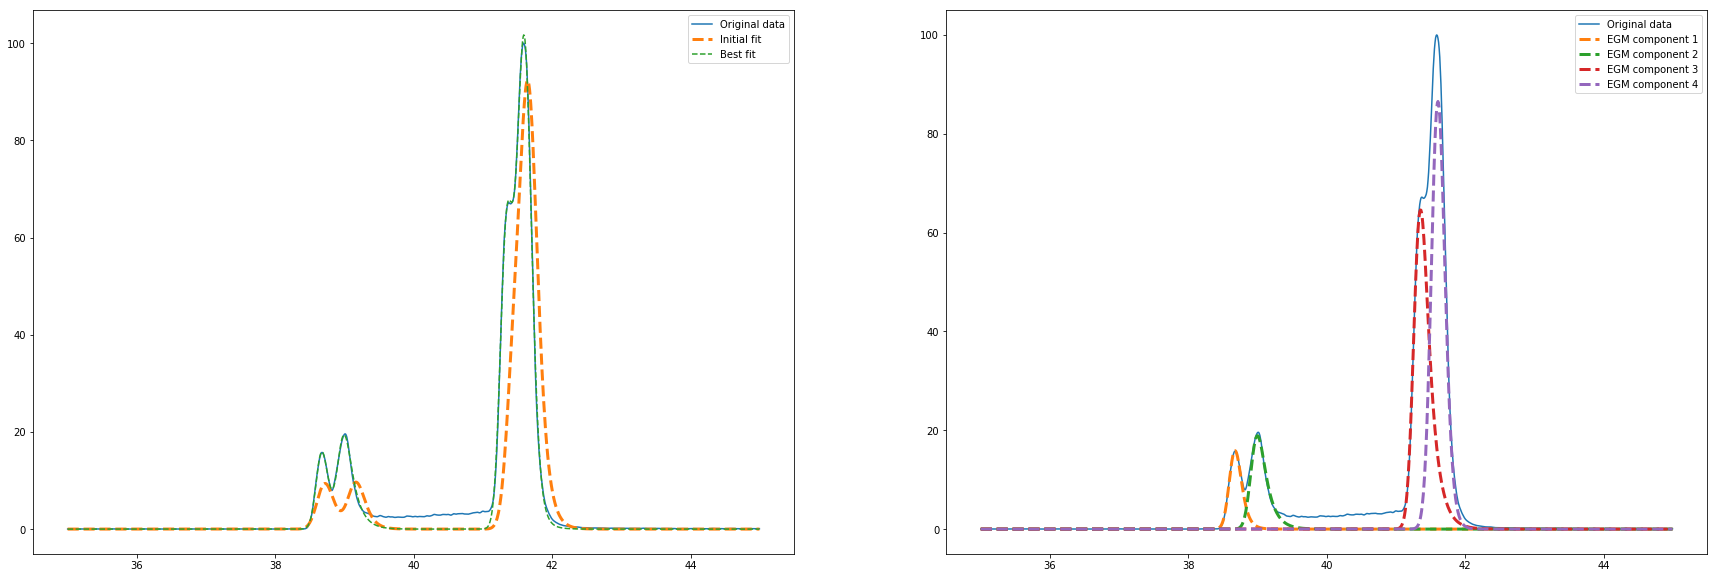

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 33
    # data points      = 1178
    # variables        = 16
    chi-square         = 1718.83343
    reduced chi-square = 1.47920261
    Akaike info crit   = 477.081077
    Bayesian info crit = 558.226250
[[Variables]]
    egm1_amplitude:  4.24005343 +/- 0.52180177 (12.31%) (init = 3)
    egm1_sigma:      0.07092543 +/- 0.00785357 (11.07%) (init = 0.1)
    egm1_center:     38.6066278 +/- 0.01387413 (0.04%) (init = 38.65)
    egm1_gamma:      8.00000000 +/- 3.19658142 (39.96%) (init = 10)
    egm1_height:     11.3645231 +/- 1.19648209 (10.53%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.16701661 +/- 0.01849374 (11.07%) == '2.3548200*egm1_sigma'
    egm2_amplitu

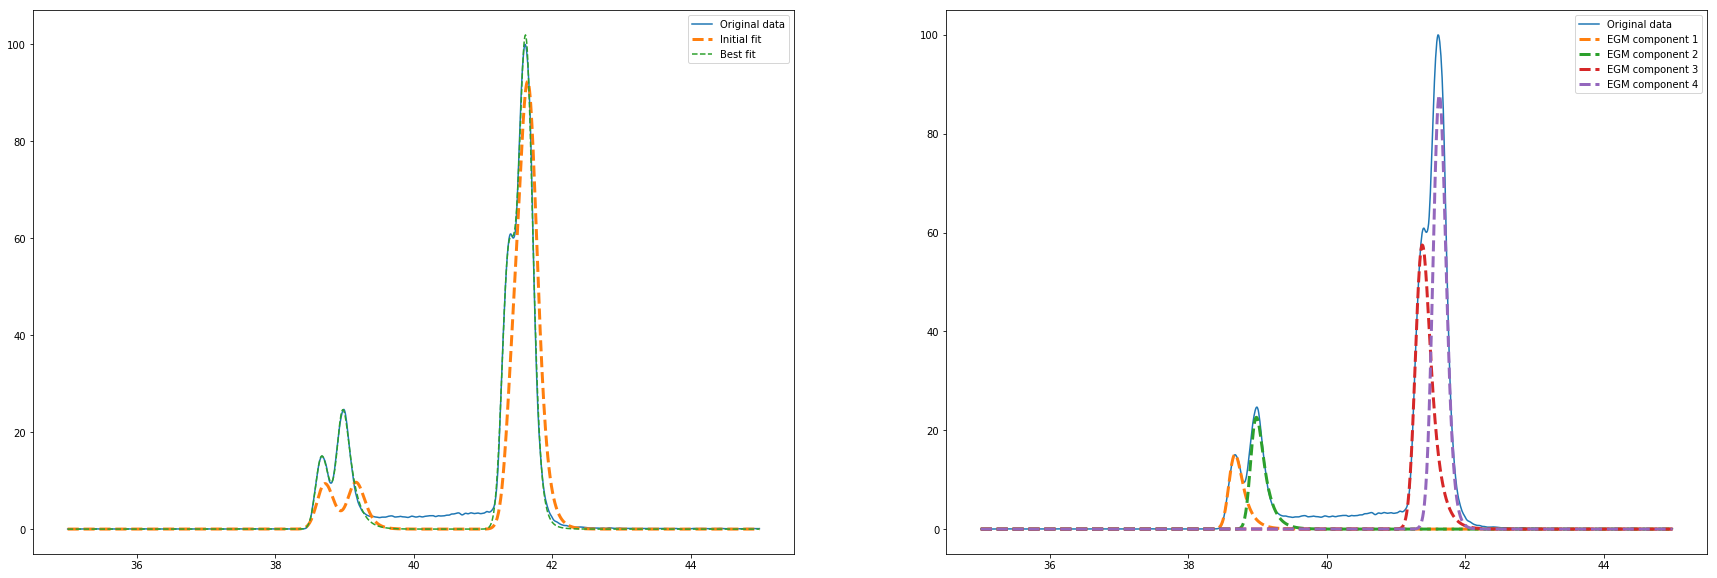

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 48
    # data points      = 1178
    # variables        = 16
    chi-square         = 1593.55289
    reduced chi-square = 1.37138803
    Akaike info crit   = 387.930297
    Bayesian info crit = 469.075471
[[Variables]]
    egm1_amplitude:  3.58724515 +/- 0.38097413 (10.62%) (init = 3)
    egm1_sigma:      0.08050960 +/- 0.01070412 (13.30%) (init = 0.1)
    egm1_center:     38.6311098 +/- 0.02994897 (0.08%) (init = 38.65)
    egm1_gamma:      16.8513376 +/- 15.2980319 (90.78%) (init = 10)
    egm1_height:     13.2674331 +/- 2.13221942 (16.07%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       0.18958563 +/- 0.02520628 (13.30%) == '2.3548200*egm1_sigma'
    egm2_amplitu

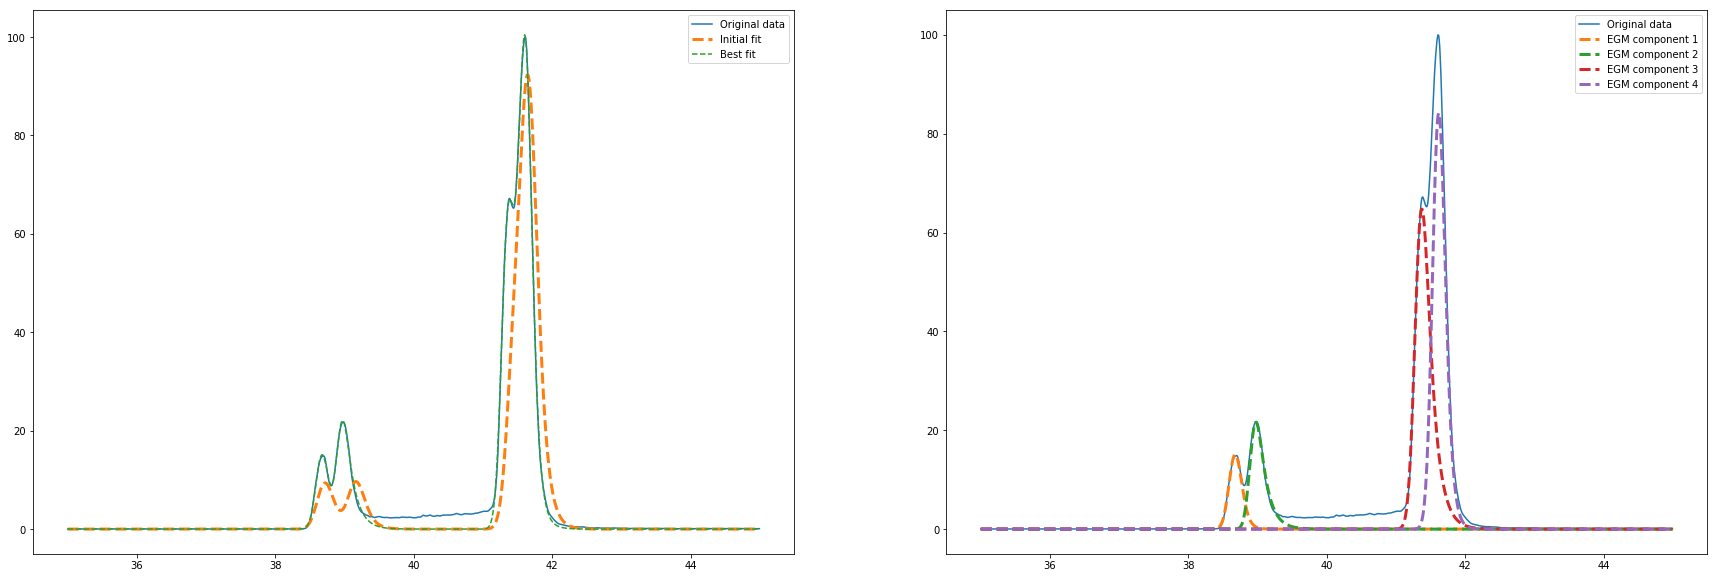

In [11]:
x = '45min'
df = pd.read_excel('pBAD33calibr_%s_80min_run_Fmoc.xlsx' % x, index_col=0)
for i in range(1,4):
    x = df.index
    y_raw = df['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=38.65, min=38.5, max=38.8)
    params['egm1_sigma'].set(value=0.1, min=0.02)
    params['egm1_amplitude'].set(value=3, min=1, max=15)
    params['egm1_gamma'].set(value=10, min=8, max = 18)

    params['egm2_center'].set(value=39.1, min=38.8, max=39.2)
    params['egm2_sigma'].set(value=0.1, min=0.02)
    params['egm2_amplitude'].set(value=3, min=1, max=15)
    params['egm2_gamma'].set(value=10, min=8, max = 18)

    params['egm3_center'].set(value=41.4, min=41.1, max=41.45)
    params['egm3_sigma'].set(value=0.1, min=0.02)
    params['egm3_amplitude'].set(value=12, min=5, max=20)
    params['egm3_gamma'].set(value=10, min=8, max = 18)

    params['egm4_center'].set(value=41.6, min=41.45, max=41.9)
    params['egm4_sigma'].set(value=0.1, min=0.02)
    params['egm4_amplitude'].set(value=25, min=5, max=30)
    params['egm4_gamma'].set(value=10, min=8, max = 18)

    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    auc['Control_45_min']['Fmoc_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                               2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}
    if i==3:
        df_out = pd.DataFrame({'Signal' : y_raw, 'Fit' : out.best_fit, 'Ile/Leu 1' : (comps['egm1_'] + comps['egm3_'])*scale/100, 'Ile/Leu 2' : (comps['egm2_'] + comps['egm4_'])*scale/100})
        deconv_fig['Control_45min_Fmoc'] = df_out

# Fmoc ItaT

[[Model]]
    (((Model(expgaussian, prefix='egm1_') + Model(expgaussian, prefix='egm2_')) + Model(expgaussian, prefix='egm3_')) + Model(expgaussian, prefix='egm4_'))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 1177
    # variables        = 16
    chi-square         = 613.652912
    reduced chi-square = 0.52855548
    Akaike info crit   = -734.573777
    Bayesian info crit = -653.442192
[[Variables]]
    egm1_amplitude:  4.42474293 +/- 0.37228496 (8.41%) (init = 1)
    egm1_sigma:      2.56852526 +/- 4.93482480 (192.13%) (init = 0.1)
    egm1_center:     38.8000000 +/- 98.2746889 (253.29%) (init = 38.65)
    egm1_gamma:      8.00000000 +/- 6316.20152 (78952.52%) (init = 10)
    egm1_height:     0.68563300 +/- 1.25587718 (183.17%) == 'egm1_amplitude*egm1_gamma/2*exp(egm1_gamma**2*egm1_sigma**2/2)*erfc(egm1_gamma*egm1_sigma/sqrt(2))'
    egm1_fwhm:       6.04841464 +/- 11.6206241 (192.13%) == '2.3548200*egm1_sigma'
    egm

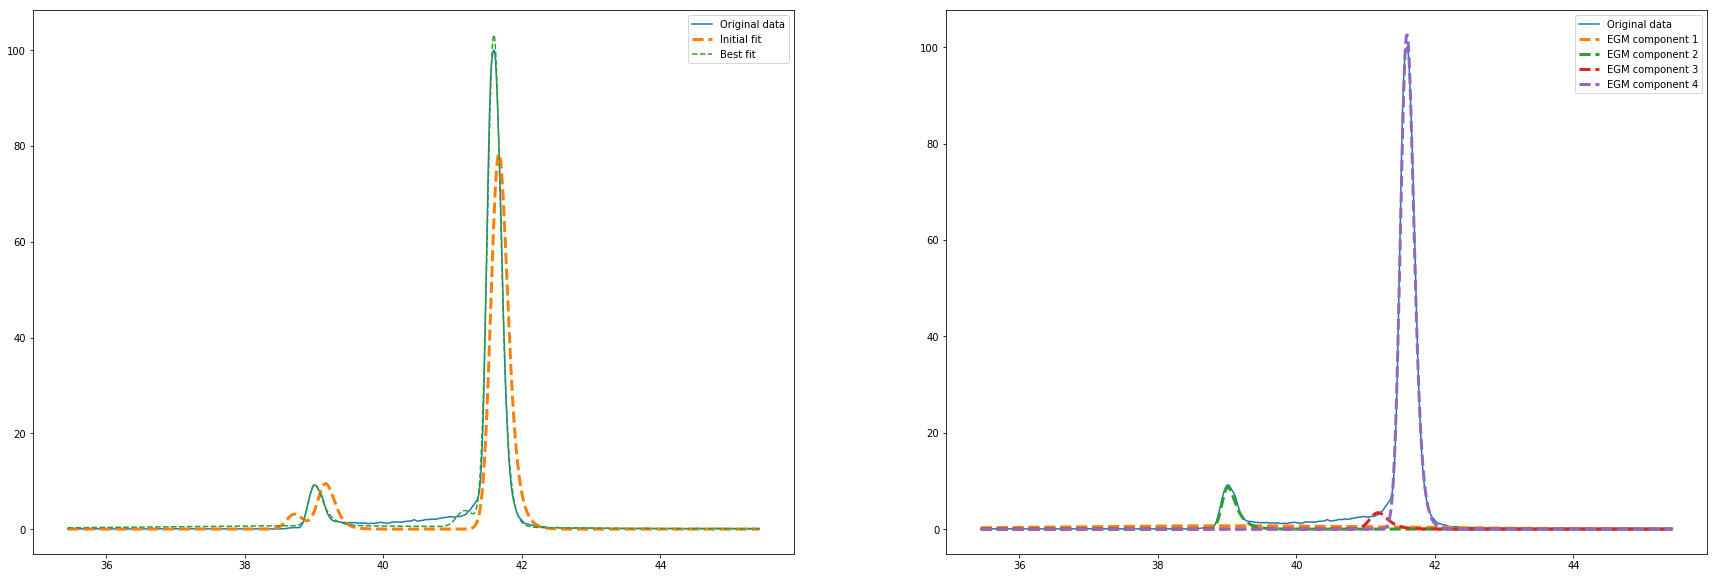

In [12]:
x = '45min'
df = pd.read_excel('ItaT_%s_80min_run_Fmoc.xlsx' % x, index_col=0)
for i in range(1,2):
    x = df.index
    y_raw = df['"%i"' % i]
    scale = max(y_raw)
    y = y_raw*100/scale
    

    egm1 = ExponentialGaussianModel(prefix='egm1_')
    egm2 = ExponentialGaussianModel(prefix='egm2_')
    egm3 = ExponentialGaussianModel(prefix='egm3_')
    egm4 = ExponentialGaussianModel(prefix='egm4_')


    params=Parameters()

    params.update(egm1.make_params())
    params.update(egm2.make_params())
    params.update(egm3.make_params())
    params.update(egm4.make_params())

    params['egm1_center'].set(value=38.65, min=38.5, max=38.8)
    params['egm1_sigma'].set(value=0.1, min=0.02)
    params['egm1_amplitude'].set(value=1, min=0.1, max=15)
    params['egm1_gamma'].set(value=10, min=8, max = 18)

    params['egm2_center'].set(value=39.1, min=38.8, max=39.2)
    params['egm2_sigma'].set(value=0.1, min=0.02)
    params['egm2_amplitude'].set(value=3, min=1, max=15)
    params['egm2_gamma'].set(value=10, min=8, max = 18)

    params['egm3_center'].set(value=41.4, min=41.1, max=41.45)
    params['egm3_sigma'].set(value=0.1, min=0.02, max=0.1)
    params['egm3_amplitude'].set(value=0.1, min=0.01, max=20)
    params['egm3_gamma'].set(value=10, min=8, max = 18)

    params['egm4_center'].set(value=41.6, min=41.45, max=41.9)
    params['egm4_sigma'].set(value=0.1, min=0.02)
    params['egm4_amplitude'].set(value=25, min=5, max=30)
    params['egm4_gamma'].set(value=10, min=8, max = 18)
    
    model = egm1 + egm2 + egm3 + egm4

    init = model.eval(params, x=x)
    out = model.fit(y, params, x=x, method='least_squares')

    print(out.fit_report(min_correl=0.5))

    fig, axes = plt.subplots(1, 2, figsize=(30, 10))
    axes[0].plot(x, y, label='Original data')
    axes[0].plot(x, init, '--', label='Initial fit', linewidth=3)
    axes[0].plot(x, out.best_fit, '--', label='Best fit')
    axes[0].legend()

    comps = out.eval_components(x=x)
    axes[1].plot(x, y, label='Original data')
    axes[1].plot(x, comps['egm1_'], '--', label='EGM component 1', linewidth=3)
    axes[1].plot(x, comps['egm2_'], '--', label='EGM component 2', linewidth=3)
    axes[1].plot(x, comps['egm3_'], '--', label='EGM component 3', linewidth=3)
    axes[1].plot(x, comps['egm4_'], '--', label='EGM component 4', linewidth=3)
    axes[1].legend()

    plt.show()
    
    '''auc['Control_45_min']['Fmoc_' + str(i)] = {1 : (out.params['egm1_amplitude'].value + out.params['egm3_amplitude'].value)*scale/100,
                                               2 : (out.params['egm2_amplitude'].value + out.params['egm4_amplitude'].value)*scale/100}'''
    if i==1:
        df_out = pd.DataFrame({'Signal' : y_raw, 'Fit' : out.best_fit, 'Ile/Leu 1' : (comps['egm1_'] + comps['egm3_'])*scale/100, 'Ile/Leu 2' : (comps['egm2_'] + comps['egm4_'])*scale/100})
        deconv_fig['ItaT_45min_Fmoc'] = df_out

In [13]:
with pd.ExcelWriter('deconvolution_values.xlsx') as writer:
    for x in auc:
        df = pd.DataFrame.from_dict(auc[x])
        df.index = ['Ile/Leu 1', 'Ile/Leu 2']
        df.to_excel(writer, sheet_name=x)

In [14]:
with pd.ExcelWriter('deconvolution_curves.xlsx') as writer:
    for x in deconv_fig:
        df = pd.DataFrame.from_dict(deconv_fig[x])
        df.to_excel(writer, sheet_name=x)

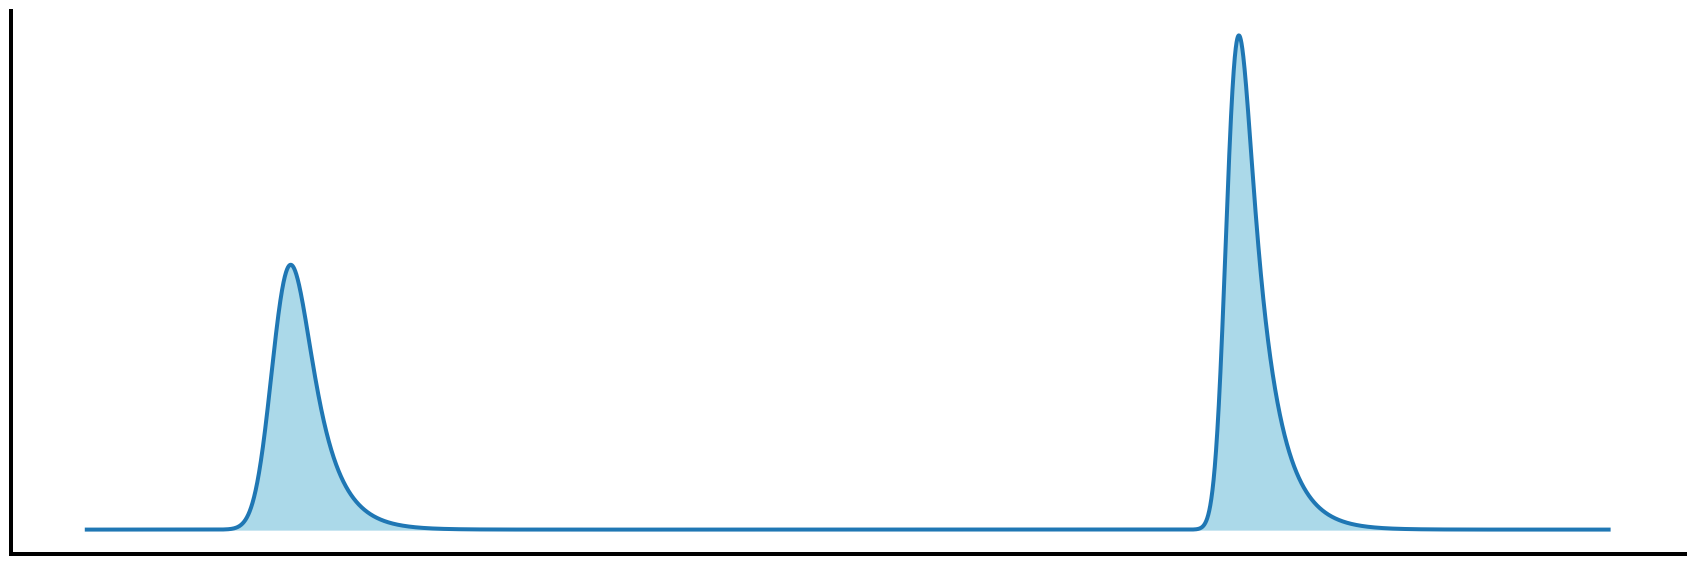

In [22]:
x=np.array(np.arange(1,9,0.0001))

egm3 = ExponentialGaussianModel(prefix='egm3_')
egm4 = ExponentialGaussianModel(prefix='egm4_')


params=Parameters()

params.update(egm3.make_params())
params.update(egm4.make_params())

params['egm3_center'].set(value=2, min=34, max=34.2)
params['egm3_sigma'].set(value=0.08, max=0.1, min=0.02)
params['egm3_amplitude'].set(value=15, min=1, max=20)
params['egm3_gamma'].set(value=8, min=8, max = 18)

params['egm4_center'].set(value=7, min=34.2, max=34.5)
params['egm4_sigma'].set(value=0.05, max=0.1, min=0.02)
params['egm4_amplitude'].set(value=22, min=5, max=40)
params['egm4_gamma'].set(value=8, min=8, max = 18)

model = egm3 + egm4

init = model.eval(params, x=x)

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(x, init, linewidth=4)
ax.fill_between(x, init, color='#abd9e9')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

ax.set_xticks([])
ax.set_yticks([])
plt.savefig('scheme_lc-ms.svg')

In [ ]:
  egm3_amplitude:  14.9096402 +/- 7.25270860 (48.64%) (init = 12)
    egm3_sigma:      0.07994637 +/- 0.02793466 (34.94%) (init = 0.08)
    egm3_center:     21.7486087 +/- 0.10225126 (0.47%) (init = 21.8)
    egm3_gamma:      17.8121650 +/- 63.0021029 (353.70%) (init = 13)
    egm3_height:     56.5267884 +/- 32.2790045 (57.10%) == 'egm3_amplitude*egm3_gamma/2*exp(egm3_gamma**2*egm3_sigma**2/2)*erfc(egm3_gamma*egm3_sigma/sqrt(2))'
    egm3_fwhm:       0.18825932 +/- 0.06578110 (34.94%) == '2.3548200*egm3_sigma'
    egm4_amplitude:  21.7026319 +/- 7.22294912 (33.28%) (init = 20)
    egm4_sigma:      0.05013018 +/- 0.00902890 (18.01%) (init = 0.08)
    egm4_center:     21.9418511 +/- 0.01113813 (0.05%) (init = 22)
    egm4_gamma:      8.00000000 +/- 1.11121195 (13.89%) (init = 13)
    egm4_height:     64.7636649 +/- 24.7060290 (38.15%) == 'egm4_amplitude*egm4_gamma/2*exp(egm4_gamma**2*egm4_sigma**2/2)*erfc(egm4_gamma*egm4_sigma/sqrt(2))'
    egm4_fwhm:       0.11804755 +/- 0.02126144 (18.01%) == '2.3548200*egm4_sigma'